In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import re
import nltk
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time 
import contractions
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing  import LabelEncoder


### Importing of Kaggle Repository Twitter Dataset

In this Classification Task, we are trying to train a model to classify our crawled dataset whether the tweets are subjective or objective, positive or negative sentiments

In [2]:
tweets = pd.read_csv("textblob_train.csv")

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88045 entries, 0 to 88044
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             88045 non-null  int64  
 1   tweet_id               88045 non-null  float64
 2   ticker_symbol          88045 non-null  object 
 3   writer                 88045 non-null  object 
 4   post_date              88045 non-null  object 
 5   body                   88045 non-null  object 
 6   comment_num            88045 non-null  int64  
 7   retweet_num            88045 non-null  int64  
 8   like_num               88045 non-null  int64  
 9   tweet_activity         88045 non-null  int64  
 10  clean_text             88045 non-null  object 
 11  sentiment_category     88045 non-null  int64  
 12  subjectivity_category  88045 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 8.7+ MB


In [4]:
tweets.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,sentiment_category,subjectivity_category
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,1,0
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,1,0
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,1,1
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,-1,1
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financi insan to buy anyth ex...,-1,0


In [5]:
tweets.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,sentiment_category,subjectivity_category
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,1,0
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,1,0
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,1,1
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,-1,1
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financi insan to buy anyth ex...,-1,0


### Importing of Crawled Twitter Dataset

This is the crawled dataset from twitter with regards to stocks such as AAPL, AMZN, MSFT, TSLA, GOOGL

In [6]:
crawled_tweets = pd.read_csv('test_textblob.csv')

In [7]:
crawled_tweets.tail()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,tweet_activity,url_cnt,emoticons,emojis,emo_cnt,word_count,clean_text,subjectivity,sentiment,moderator,clean_text_no_stem_user
4293,TSLA,2023-02-28 23:25:43+00:00,1.630711e+18,BestTrader01,"$TSLA #TSLA Options Interest! $800sssss, 600ss...",59,7,71,1,[],{},0,10,tsla tsla option interest 800sssss 600sss 300s...,0,0,NaN,TSLA TSLA Options Interest 800sssss 600sss 300...
4294,TSLA,2023-02-28 23:23:40+00:00,1.630710e+18,MatchasmMatt,$RIVN down nearly 10% after earnings. These co...,84,10,96,0,[],{},0,10,rivn nearli 10 earn compani make tsla look goo...,1,1,1.0,RIVN nearly 10 earnings These companies making...
4295,TSLA,2023-02-28 23:20:10+00:00,1.630709e+18,susanblas,No surprise here. $TSLA does not give a flying...,39,0,50,0,[],{},0,8,surpris tsla give fli fuck custom theyv taken,1,-1,NaN,No surprise TSLA give flying fuck customers th...
4296,TSLA,2023-02-28 23:12:27+00:00,1.630708e+18,stevenmarkryan,Is it just me or is it CREEPY AF that I get no...,267,37,311,0,[],{},0,23,creepi af get notif someon add list includ ad ...,0,0,NaN,Is CREEPY AF I get notifications someone adds ...
4297,TSLA,2023-02-28 23:06:48+00:00,1.630706e+18,stevenmarkryan,Can't wait to see how pissed the cry babies wh...,289,16,320,0,[],{},0,31,cant wait see piss cri babi also tsla elonmusk...,1,-1,NaN,Cant wait see pissed cry babies also TSLA elon...


In [8]:
remaining_data = pd.read_csv('remaining_data.csv')

In [9]:
remaining_data.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,emoticons,emojis,emo_cnt,word_count,clean_text
0,APPL,2023-01-01 21:51:38+00:00,1609668699513839616,BalarezoCapital,$AAPL \n\nAAPL is in a DOWNTREND below all KMA...,9,0,3,12,1,[],{},0,16,aapl aapl downtrend kma high probabl continu l...
1,APPL,2023-01-01 21:31:03+00:00,1609663518265192448,DZierler,@Johnbenny101 I believe winning #VR #MixedReal...,6,1,3,10,0,[],{'✅': 5},5,41,johnbenny101 believ win vr mixedr ar display a...
2,APPL,2023-01-01 21:30:09+00:00,1609663291793747969,SPXTrades,Everyone is looking for $AAPL to fall into 95-...,20,2,1,23,1,[],{},0,33,everyon look aapl fall 95100 zone last bulwark...
3,APPL,2023-01-01 21:00:03+00:00,1609655716767318021,bullsonwallst,Current Berkshire Hathaway portfolio📊\n\nToo m...,11,1,3,15,1,[],{'📊': 1},1,7,current berkshir hathaway portfolioemojiplaceh...
4,APPL,2023-01-01 20:15:42+00:00,1609644555598438400,ThePupOfWallSt,#AAPL $AAPL Weekly Chart⁠\n⁠\nNotes on the cha...,14,1,5,20,1,[],{},0,9,aapl aapl weekli chart note chart courtesi tre...


In [10]:
def datasetInfo(dataset):
    print(f" Dataset Information and type \n {dataset.info()}")
    print("--------------------------------------------------------\n\n Data Types: ")
    print(dataset.dtypes)
    print("--------------------------------------------------------\n\n Rows and Columns: ")
    print(dataset.shape)
    print("--------------------------------------------------------\n\n Column Names: ")
    print(dataset.columns)
    print("--------------------------------------------------------\n\n Null Values: ")
    print(dataset.apply(lambda x: sum(x.isnull()) / len(dataset)))
    print("--------------------------------------------------------\n\n Unique Values: ")
    print(dataset.nunique())
    print("--------------------------------------------------------\n\n Describe: ")
    print(dataset.describe())

In [11]:
datasetInfo(tweets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88045 entries, 0 to 88044
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             88045 non-null  int64  
 1   tweet_id               88045 non-null  float64
 2   ticker_symbol          88045 non-null  object 
 3   writer                 88045 non-null  object 
 4   post_date              88045 non-null  object 
 5   body                   88045 non-null  object 
 6   comment_num            88045 non-null  int64  
 7   retweet_num            88045 non-null  int64  
 8   like_num               88045 non-null  int64  
 9   tweet_activity         88045 non-null  int64  
 10  clean_text             88045 non-null  object 
 11  sentiment_category     88045 non-null  int64  
 12  subjectivity_category  88045 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 8.7+ MB
 Dataset Information and type 
 None
------------

In [12]:
datasetInfo(remaining_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ticker_symbol   3080 non-null   object
 1   post_date       3080 non-null   object
 2   tweet_id        3080 non-null   int64 
 3   writer          3080 non-null   object
 4   body            3080 non-null   object
 5   like_num        3080 non-null   int64 
 6   comment_num     3080 non-null   int64 
 7   retweet_num     3080 non-null   int64 
 8   tweet_activity  3080 non-null   int64 
 9   url_cnt         3080 non-null   int64 
 10  emoticons       3080 non-null   object
 11  emojis          3080 non-null   object
 12  emo_cnt         3080 non-null   int64 
 13  word_count      3080 non-null   int64 
 14  clean_text      3080 non-null   object
dtypes: int64(8), object(7)
memory usage: 361.1+ KB
 Dataset Information and type 
 None
--------------------------------------------------------

In [13]:
datasetInfo(crawled_tweets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4298 entries, 0 to 4297
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker_symbol            4298 non-null   object 
 1   post_date                4298 non-null   object 
 2   tweet_id                 4298 non-null   float64
 3   writer                   4298 non-null   object 
 4   body                     4298 non-null   object 
 5   like_num                 4298 non-null   int64  
 6   comment_num              4298 non-null   int64  
 7   tweet_activity           4298 non-null   int64  
 8   url_cnt                  4298 non-null   int64  
 9   emoticons                4298 non-null   object 
 10  emojis                   4298 non-null   object 
 11  emo_cnt                  4298 non-null   int64  
 12  word_count               4298 non-null   int64  
 13  clean_text               4298 non-null   object 
 14  subjectivity            

In [14]:
crawled_tweets.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,tweet_activity,url_cnt,emoticons,emojis,emo_cnt,word_count,clean_text,subjectivity,sentiment,moderator,clean_text_no_stem_user
0,AAPL,2023-01-01 22:23:31+00:00,1.609677e+18,David_Tracey,Things are going to get very interesting but w...,27,1,30,2,[],{},0,11,thing go get interest q1 forecast updat aapl r...,0,0,NaN,Things going get interesting My Q1 forecast So...
1,AAPL,2023-01-01 21:04:45+00:00,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,67,1,[],"{'🚀': 1, '🤠': 1}",2,21,happi new year spacemob let hope 2023 year blu...,0,1,NaN,Happy New Year SpaceMob Lets hope 2023 year Bl...
2,AAPL,2023-01-01 20:44:51+00:00,1.609652e+18,BigCheds,$AAPL Apple weekly chart - hammer candle with ...,104,9,118,1,[],{},0,10,aapl appl weekli chart hammer candl spring jun...,0,0,NaN,AAPL Apple weekly chart hammer candle spring J...
3,AAPL,2023-01-01 19:45:30+00:00,1.609637e+18,ThetaWarrior,$AAPL Yearly -26.8% https://t.co/SewErQmOPE,80,10,100,1,[],{},0,4,aapl yearli 268,0,0,NaN,AAPL Yearly 268
4,AAPL,2023-01-01 19:00:00+00:00,1.609626e+18,TrendSpider,Looking for shorts into the new year? 📉\n\nThi...,28,4,36,1,[],{'📉': 1},1,23,look short new year weekli triangl breakdown s...,0,1,NaN,Looking shorts new year This weekly triangle b...


After Merging Remove the dataframes that columns are empty

In [15]:
tweets.dropna(inplace = True)

Refactoring the Polarity Values of testing crawled_tweets

Convert our tweet date_time into just date

In [16]:
tweets['post_date'] = pd.to_datetime(tweets["post_date"],utc = False , unit = 's',).dt.normalize()
tweets['post_date'] = tweets["post_date"].dt.date
tweets.head()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas\_libs\tslib.pyx", line 315, in pandas._libs.tslib.array_with_unit_to_datetime
ValueError: could not convert string to float: '5/7/2018'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\eric2\AppData\Local\Temp\ipykernel_61348\193415904.py", line 1, in <module>
    tweets['post_date'] = pd.to_datetime(tweets["post_date"],utc = False , unit = 's',).dt.normalize()
  File "C:\Users\eric2\AppData\Roaming\Python\Python310\site-packages\pandas\core\tools\datetimes.py", line 1047, in to_datetime
    cache_array = _maybe_cache(arg, format, cache, convert_listlike)
  File "C:\Users\eric2\AppData\Roaming\Python\Python310\site-packages\pandas\core\tools\datetimes.py", line 197, in _maybe

In [17]:
crawled_tweets['post_date'] = pd.to_datetime(crawled_tweets['post_date'])
crawled_tweets['post_date'] = crawled_tweets['post_date'].dt.date

We need to differentiate active tweets which are more "Reputable" compared to botting tweets or spams. <br>
Activities can be defined as comments/replies, retweets, and likes.

In [18]:
tweets.sort_values(by = "comment_num" , ascending  = False, inplace = True)
tweets


,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,sentiment_category,subjectivity_category
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,1,0
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,1,0
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,1,1
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,-1,1
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financi insan to buy anyth ex...,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81081,4180147,1.140000e+18,TSLA,Dope007,11/6/2019,Fraudulent slip there Musk. Convince investors...,0,3,31,34,fraudul slip there musk convinc investor oop i...,-1,1
81082,4176267,1.140000e+18,TSLA,TommyThornton,6/6/2019,From the lows your beloved $TSLA only needs to...,0,0,33,33,from the low your belov tsla onli need to go u...,1,1
81083,4176276,1.140000e+18,TSLA,PTBarnu88732123,6/6/2019,Only a total dipshit would compare $tsla stock...,0,2,27,29,onli a total dipshit would compar tsla stock p...,1,1
81084,4176239,1.140000e+18,TSLA,EthicsGradient,6/6/2019,$TSLA Very big news for China!,0,9,43,52,tsla veri big news for china,0,0


The tweet activities will be defined by the summation of all comments/replies, likes and retweets to differentiate from bots or spams, where tweets are more "usable" for sentimental analysis

In [19]:
tweets["tweet_activity"] = tweets["comment_num"] + tweets["like_num"] + tweets["retweet_num"]
tweets

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,sentiment_category,subjectivity_category
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,1,0
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,1,0
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,1,1
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,-1,1
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financi insan to buy anyth ex...,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81081,4180147,1.140000e+18,TSLA,Dope007,11/6/2019,Fraudulent slip there Musk. Convince investors...,0,3,31,34,fraudul slip there musk convinc investor oop i...,-1,1
81082,4176267,1.140000e+18,TSLA,TommyThornton,6/6/2019,From the lows your beloved $TSLA only needs to...,0,0,33,33,from the low your belov tsla onli need to go u...,1,1
81083,4176276,1.140000e+18,TSLA,PTBarnu88732123,6/6/2019,Only a total dipshit would compare $tsla stock...,0,2,27,29,onli a total dipshit would compar tsla stock p...,1,1
81084,4176239,1.140000e+18,TSLA,EthicsGradient,6/6/2019,$TSLA Very big news for China!,0,9,43,52,tsla veri big news for china,0,0


### Filter Tweets that are >= 10 activities

In [20]:
filterTweets = tweets.loc[tweets["tweet_activity"] > 25]

In [21]:
filterTweets.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,sentiment_category,subjectivity_category
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,1,0
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,1,0
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,1,1
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,-1,1
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financi insan to buy anyth ex...,-1,0


In [22]:
filterTweets.describe()

,Unnamed: 0,tweet_id,comment_num,retweet_num,like_num,tweet_activity,sentiment_category,subjectivity_category
count,8.804500e+04,8.804500e+04,88045.000000,88045.000000,88045.000000,88045.000000,88045.000000,88045.000000
mean,3.266381e+06,1.037548e+18,6.009790,17.359135,58.161804,81.530729,0.285763,0.315566
std,1.165772e+06,1.434625e+17,11.197338,45.525474,75.893739,104.740242,0.773832,0.464743
min,4.000000e+01,5.500000e+17,0.000000,0.000000,0.000000,26.000000,-1.000000,0.000000
25%,2.490996e+06,9.960000e+17,1.000000,4.000000,24.000000,34.000000,0.000000,0.000000
50%,3.867796e+06,1.070000e+18,3.000000,8.000000,35.000000,48.000000,0.000000,0.000000
75%,4.112427e+06,1.130000e+18,7.000000,17.000000,61.000000,84.000000,1.000000,1.000000
max,4.336399e+06,1.210000e+18,631.000000,999.000000,999.000000,1703.000000,1.000000,1.000000


### Data Cleaning and Tokenization of text body

In [23]:
# Function to remove stopwords (common english stopwords from nltk)
def removeStopWords(df):
    finalList = []
    stop_words = set(stopwords.words('english'))
    negativeList = ['not','no', 'nor']
    for x in negativeList:
        stop_words.remove(x)
    for word in df:
        if word not in stop_words:
            finalList.append(word)
    df = finalList
    return df

In [24]:
# Function to stem tweets 
def stem_text(text):
    
    stemmer = PorterStemmer()
   
    return [stemmer.stem(word) for word in text]

In [25]:
# Function to lemmatise tweets
def lemmatised_text(text):
    lemmatiser = nltk.stem.WordNetLemmatizer()
    return [lemmatiser.lemmatize(word) for word in text]

In [26]:
def replace_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

In [27]:
def remove_username(text):
    return re.sub(r'@\w+', '', text)

In [28]:
def remove_hashtag(text):
    return re.sub(r'#\w+', '', text)

In [29]:
def clean_dataframe_text(df, column,lemma):
    
    # Define regex pattern to match URLs
    url_pattern = r"https?://\S+"
    # Remove URLs from text column
    df[column] = df[column].str.replace(url_pattern, "", regex=True)
    # Remove username from text column
    df[column] = df[column].apply(lambda x: remove_username(x))
     # Remove hashtag from text column
    df[column] = df[column].apply(lambda x: remove_hashtag(x))
    #df[column] = df[column].apply(lambda x: replace_contractions(x))
    df[column] = df[column].apply(lambda x: re.sub(r"(\w+)'d", lambda m: 'would' if m.group(1) in ['he', 'she', 'it', 'that'] else 'had', x))
    # Replace 's with 'is' or 'has'
    df[column] = df[column].apply(lambda x: re.sub(r"(\w+)'s", lambda m: 'is' if m.group(1) in ['he', 'she', 'it'] else 'has', x))
    # Remove any non-alphanumeric characters and replace them with spaces
    df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    # Replace any consecutive whitespace characters with a single space
    df[column] = df[column].apply(lambda x: re.sub(r'\s+', ' ', x))
    # Remove not word characters
    df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
    # Remove digits 
    df[column] = df[column].apply(lambda x: re.sub(r'\d+', '', x))
    # Convert the string in lower
    df[column] = df[column].str.lower()
    # Tokenised the words
    df[column]  = df[column].apply(lambda x : nltk.word_tokenize(x))
    # Remove stopwords from the NLTK stopword list
    df[column] = df[column].apply(lambda x : removeStopWords(x))
    if lemma:
    # lemmatised the text
        df[column] = df[column].apply(lambda x : lemmatised_text(x))
    else:
    # Stemmed the text
        df[column] = df[column].apply(lambda x : stem_text(x))
    #concatenate the tokenised list into string
    df[column] = df[column].apply(lambda x: ' '.join(x))
    return df

In [30]:
filterTweetsNo = filterTweets.copy()
crawledTweetsNo = crawled_tweets.copy()

In [31]:
# Tweets that are cleaned and lemmatised
filterTweetsLemma = filterTweets.copy()
filterTweetsLemma = clean_dataframe_text(filterTweetsLemma,"clean_text",True)
filterTweetsLemma.head()

KeyError: 'never'

In [ ]:
# Tweets that are cleaned and stemmed

filterTweets = clean_dataframe_text(filterTweets,"clean_text",False)
filterTweets.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,sentiment_category,subjectivity_category
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,1,0
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,1,0
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,1,1
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,-1,1
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financ insan to buy anyth exc...,-1,0


In [ ]:
# crawled_tweets = crawled_tweets[2146:2548]

In [ ]:
crawled_tweets_lemma = crawled_tweets.copy()
crawled_tweets_lemma = clean_dataframe_text(crawled_tweets_lemma,"clean_text",True)

In [ ]:

crawled_tweets = clean_dataframe_text(crawled_tweets,"clean_text",False)

In [ ]:
filterTweets

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,sentiment_category,subjectivity_category
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,1,0
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,1,0
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,1,1
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,-1,1
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financ insan to buy anyth exc...,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81081,4180147,1.140000e+18,TSLA,Dope007,11/6/2019,Fraudulent slip there Musk. Convince investors...,0,3,31,34,fraudul slip there musk convinc investor oop i...,-1,1
81082,4176267,1.140000e+18,TSLA,TommyThornton,6/6/2019,From the lows your beloved $TSLA only needs to...,0,0,33,33,from the low your belov tsla onli need to go u...,1,1
81083,4176276,1.140000e+18,TSLA,PTBarnu88732123,6/6/2019,Only a total dipshit would compare $tsla stock...,0,2,27,29,onli a total dipshit would compar tsla stock p...,1,1
81084,4176239,1.140000e+18,TSLA,EthicsGradient,6/6/2019,$TSLA Very big news for China!,0,9,43,52,tsla veri big news for china,0,0


In [ ]:
crawled_tweets

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,tweet_activity,url_cnt,emoticons,emojis,emo_cnt,word_count,clean_text,subjectivity,sentiment,moderator,clean_text_no_stem_user
0,AAPL,2023-01-01,1.609677e+18,David_Tracey,Things are going to get very interesting but w...,27,1,30,2,[],{},0,11,thing go get interest q forecast updat aapl re...,0,0,NaN,Things going get interesting My Q1 forecast So...
1,AAPL,2023-01-01,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,67,1,[],"{'🚀': 1, '🤠': 1}",2,21,happi new year spacemob let hope year bluewalk...,0,1,NaN,Happy New Year SpaceMob Lets hope 2023 year Bl...
2,AAPL,2023-01-01,1.609652e+18,BigCheds,$AAPL Apple weekly chart - hammer candle with ...,104,9,118,1,[],{},0,10,aapl appl weekli chart hammer candl spring jun...,0,0,NaN,AAPL Apple weekly chart hammer candle spring J...
3,AAPL,2023-01-01,1.609637e+18,ThetaWarrior,$AAPL Yearly -26.8% https://t.co/SewErQmOPE,80,10,100,1,[],{},0,4,aapl yearli,0,0,NaN,AAPL Yearly 268
4,AAPL,2023-01-01,1.609626e+18,TrendSpider,Looking for shorts into the new year? 📉\n\nThi...,28,4,36,1,[],{'📉': 1},1,23,look short new year weekli triangl breakdown s...,0,1,NaN,Looking shorts new year This weekly triangle b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,TSLA,2023-02-28,1.630711e+18,BestTrader01,"$TSLA #TSLA Options Interest! $800sssss, 600ss...",59,7,71,1,[],{},0,10,tsla tsla option interest sssss sss ss let go,0,0,NaN,TSLA TSLA Options Interest 800sssss 600sss 300...
4294,TSLA,2023-02-28,1.630710e+18,MatchasmMatt,$RIVN down nearly 10% after earnings. These co...,84,10,96,0,[],{},0,10,rivn nearli earn compani make tsla look good c...,1,1,1.0,RIVN nearly 10 earnings These companies making...
4295,TSLA,2023-02-28,1.630709e+18,susanblas,No surprise here. $TSLA does not give a flying...,39,0,50,0,[],{},0,8,surpri tsla give fli fuck custom theyv taken,1,-1,NaN,No surprise TSLA give flying fuck customers th...
4296,TSLA,2023-02-28,1.630708e+18,stevenmarkryan,Is it just me or is it CREEPY AF that I get no...,267,37,311,0,[],{},0,23,creepi af get notif someon add list includ ad ...,0,0,NaN,Is CREEPY AF I get notifications someone adds ...


### Tweet EDA

In [ ]:
filterTweets["writer"].describe()


count           88045
unique           4690
top       TESLAcharts
freq             3605
Name: writer, dtype: object

In [ ]:
crawled_tweets["writer"].describe()

count             4298
unique            1253
top       StockMKTNewz
freq               146
Name: writer, dtype: object

### Writer Data Exploration

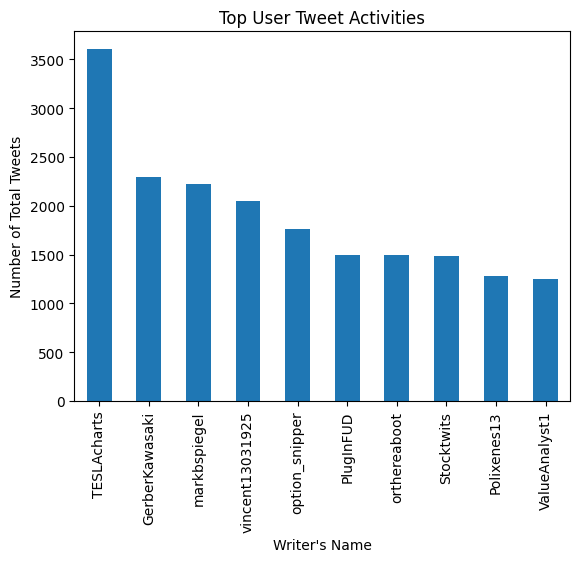

In [ ]:

counts = filterTweets["writer"].value_counts(ascending= False)
countsFilter = counts[:10]
countsFilter.plot(kind="bar")

plt.title("Top User Tweet Activities")
plt.ylabel("Number of Total Tweets")
plt.xlabel("Writer's Name")
plt.show()

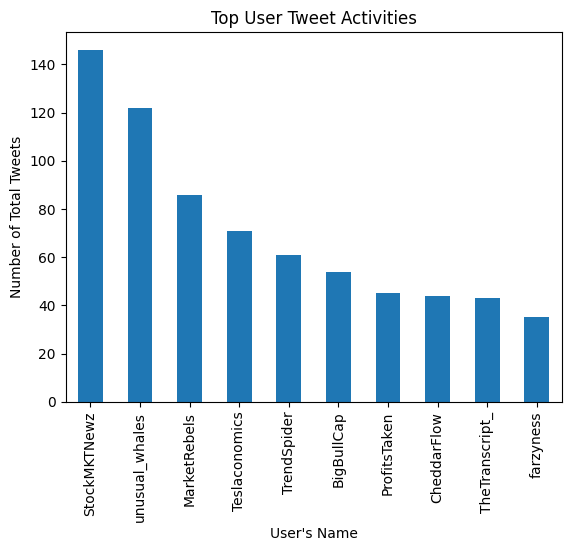

In [ ]:
counts = crawled_tweets["writer"].value_counts(ascending= False)
countsFilter = counts[:10]
countsFilter.plot(kind="bar")

plt.title("Top User Tweet Activities")
plt.ylabel("Number of Total Tweets")
plt.xlabel("User's Name")
plt.show()

Graph above shows active users/writers

<AxesSubplot: ylabel='ticker_symbol'>

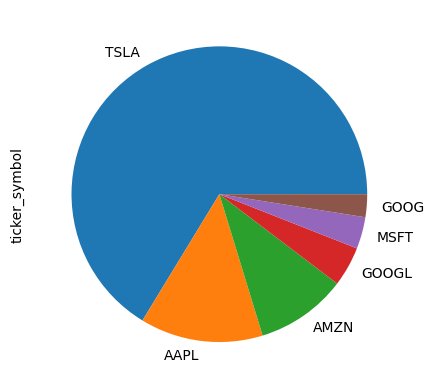

In [ ]:
counts = filterTweets["ticker_symbol"].value_counts()
counts.plot(kind="pie")

<AxesSubplot: ylabel='ticker_symbol'>

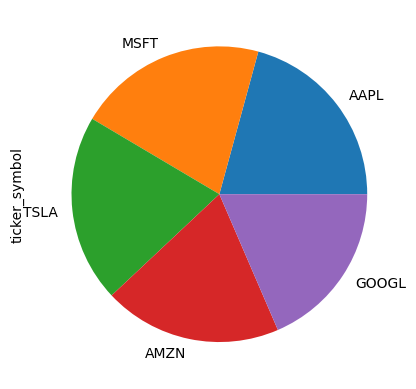

In [ ]:
counts = crawled_tweets["ticker_symbol"].value_counts()
counts.plot(kind="pie")

Notice that there are more TSLA tweets in the dataset.

### Active Tweets dates

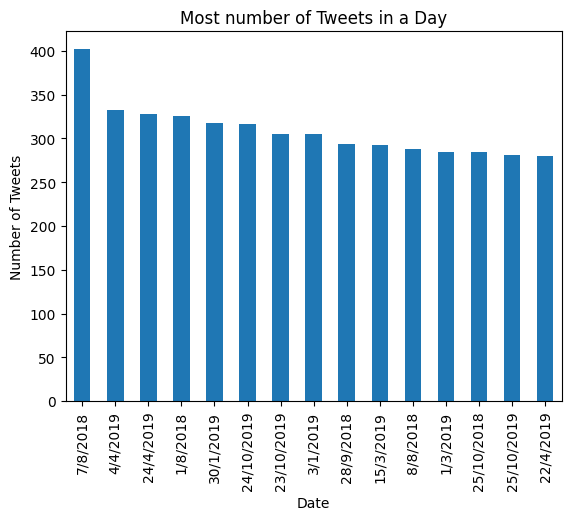

In [ ]:
count = filterTweets["post_date"].value_counts(ascending = False)
count
filterCounts = count[:15]
filterCounts.plot(kind = "bar")
plt.title("Most number of Tweets in a Day")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.show()

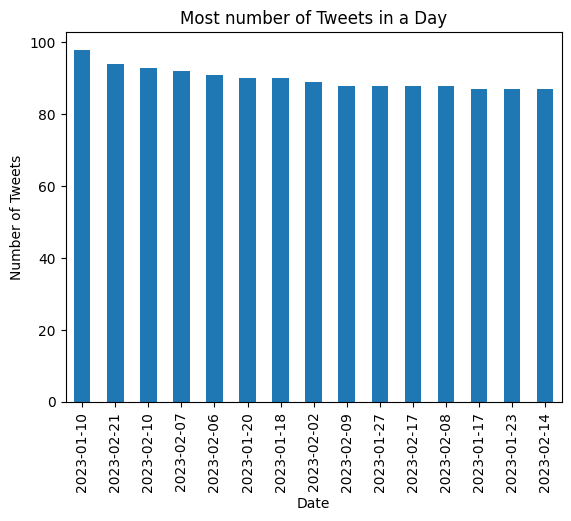

In [ ]:
count = crawled_tweets["post_date"].value_counts(ascending = False)
count
filterCounts = count[:15]
filterCounts.plot(kind = "bar")
plt.title("Most number of Tweets in a Day")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.show()

Above bar graphs shows the highest tweets in the respective days

### Word Cloud of Tweets

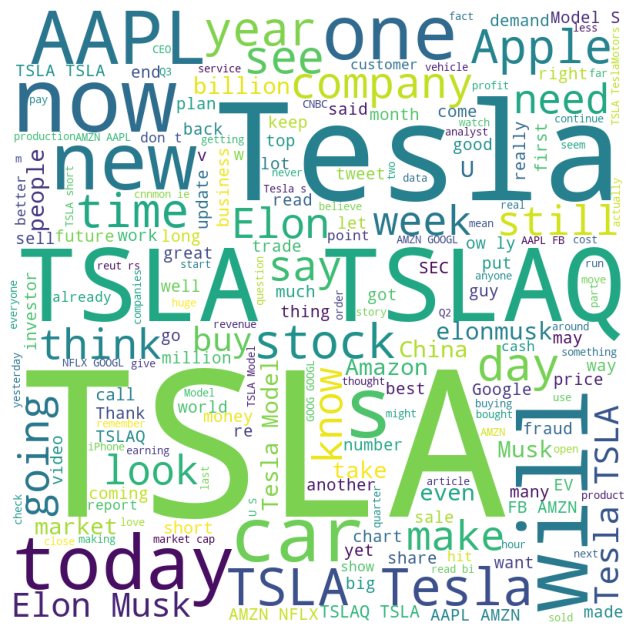

In [ ]:
text = " ".join(filterTweets["body"])
wordcloud = WordCloud(width = 800, height = 800, background_color='white', max_words = 200)
wordcloud.generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

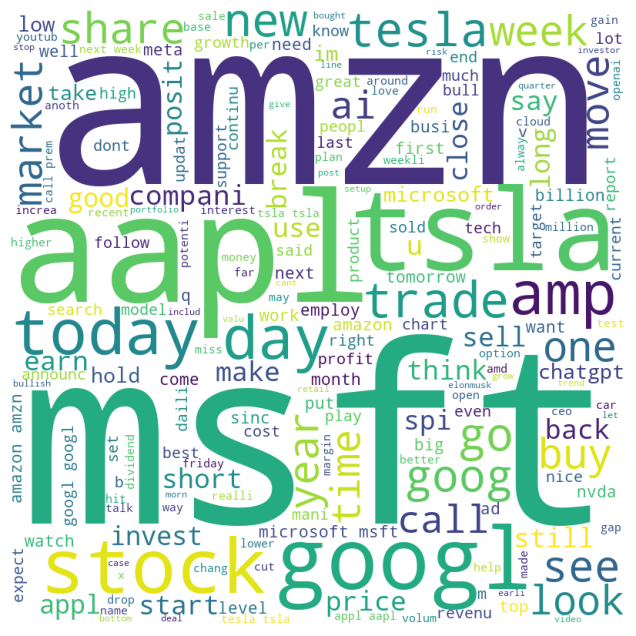

In [ ]:
text = " ".join(crawled_tweets["clean_text"])
wordcloud = WordCloud(width = 800, height = 800, background_color='white', max_words = 200)
wordcloud.generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the word cloud we can tell that tsla aapl msft are common tweets in Twitter

In [ ]:
filterTweets.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,sentiment_category,subjectivity_category
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,1,0
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,1,0
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,1,1
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,-1,1
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financ insan to buy anyth exc...,-1,0


### Convert Positive, Negative and Neutral to numeral labels and Subjectivity

### Splitting up data for Prediction using ensemble machine learning models For Blob Subjectivity and Polarity Analysis

In [ ]:
X = filterTweets["clean_text"].values 
y = filterTweets[["sentiment_category"]].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [ ]:
X_no = filterTweets["clean_text"].values 
y_no = filterTweets[["sentiment_category"]].values
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(
    X_no, y_no, test_size=0.20, random_state=0)

In [ ]:
X_lemma = filterTweetsLemma["clean_text"].values 
y_lemma = filterTweetsLemma[["sentiment_category"]].values
X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma = train_test_split(
    X_lemma, y_lemma, test_size=0.20, random_state=0)

In [ ]:
X_subj = filterTweets["clean_text"].values 
y_subj = filterTweets["subjectivity_category"].values
X_train_subj, X_test_subj, y_train_subj, y_test_subj = train_test_split(
    X_subj, y_subj, test_size=0.20, random_state=0)

In [ ]:
X_subj_no = filterTweetsNo["clean_text"].values 
y_subj_no = filterTweetsNo["subjectivity_category"].values
X_train_subj_no, X_test_subj_no, y_train_subj_no, y_test_subj_no = train_test_split(
    X_subj_no, y_subj_no, test_size=0.20, random_state=0)

In [ ]:
X_subj_lemma = filterTweetsLemma["clean_text"].values 
y_subj_lemma = filterTweetsLemma["subjectivity_category"].values
X_train_subj_lemma, X_test_subj_lemma, y_train_subj_lemma, y_test_subj_lemma = train_test_split(
    X_subj_lemma, y_subj_lemma, test_size=0.20, random_state=0)

In [ ]:
filterTweets["subjectivity_category"].value_counts()

0    60261
1    27784
Name: subjectivity_category, dtype: int64

### Evaluation Data -> Crawled and labelled data

In [ ]:
#Evluation Data for Subjectivity
eval_data_x = crawled_tweets['clean_text'].values
eval_data_x_lemma = crawled_tweets_lemma['clean_text'].values
eval_data_y = crawled_tweets['subjectivity'].values
eval_data_y_lemma = crawled_tweets_lemma['subjectivity'].values
eval_data_x_no = crawledTweetsNo['clean_text'].values
eval_data_y_no = crawledTweetsNo['subjectivity'].values


In [ ]:
def metric_report(y_test,y_pred,time,no_record_x_test,y_eval, y_pred_eval,time_eval,no_record_x_eval):
    accuracy = accuracy_score(y_test,y_pred)
    fmeasure = f1_score(y_test,y_pred, average = "weighted", zero_division = 1)
    recall = recall_score(y_test, y_pred, average = "weighted",zero_division = 1)
    precision = precision_score(y_test, y_pred, average = "weighted",zero_division = 1)

    
    print(f"Model Metrics with testing data")
    print(f"The accuracy of the Model is {accuracy}")
    print(f"The F-Score of the Model is {fmeasure}")
    print(f"The Recall of the Model is {recall}")
    print(f"The precision of the Model is {precision}")
    print(f"The time taken for the Model prediction is {time} seconds")
    print(f"The number of records per second is {no_record_x_test//time}")
    print(f"================================================================")
    

    accuracy_eval = accuracy_score(y_eval,y_pred_eval)
    fmeasure_eval = f1_score(y_eval,y_pred_eval, average = "weighted", zero_division = 1)
    recall_eval = recall_score(y_eval, y_pred_eval, average = "weighted",zero_division = 1)
    precision_eval = precision_score(y_eval, y_pred_eval, average = "weighted",zero_division = 1)
    print(f"Model Metrics with evaluation data")
    print(f"The accuracy of the Model is {accuracy_eval}")
    print(f"The F-Score of the Model is {fmeasure_eval}")
    print(f"The Recall of the Model is {recall_eval}")
    print(f"The precision of the Model is {precision_eval}")
    print(f"The time taken for the Model prediction is {time_eval} seconds")
    print(f"The number of records per second is {no_record_x_eval//time_eval}")

In [ ]:
def metric_report_noeval(y_test,y_pred,time,no_record_x_test):
    accuracy = accuracy_score(y_test,y_pred)
    fmeasure = f1_score(y_test,y_pred, average = "weighted", zero_division = 1)
    recall = recall_score(y_test, y_pred, average = "weighted",zero_division = 1)
    precision = precision_score(y_test, y_pred, average = "weighted",zero_division = 1)

    
    print(f"Model Metrics with testing data")
    print(f"The accuracy of the Model is {accuracy}")
    print(f"The F-Score of the Model is {fmeasure}")
    print(f"The Recall of the Model is {recall}")
    print(f"The precision of the Model is {precision}")
    print(f"The time taken for the Model prediction is {time} seconds")
    print(f"The number of records per second is {no_record_x_test//time}")
    print(f"================================================================")

### Vectorise and TFIDF train and test datas

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
# Create Count Vectorizer (TF)
vectoriser = CountVectorizer()

# For blob analysis dataset that have been stemmed

X_train_vec = vectoriser.fit_transform(X_train)
X_test_vec = vectoriser.transform(X_test)
eval_data_x_vec = vectoriser.transform(eval_data_x)

X_train_no_vec = vectoriser.fit_transform(X_train_no)
X_test_no_vec = vectoriser.transform(X_test_no)
eval_data_x_no_vec= vectoriser.transform(eval_data_x_no)


# For blob analysis dataset that have been lemmatised
X_train_lemma_vec = vectoriser.fit_transform(X_train_lemma)
X_test_lemma_vec = vectoriser.transform(X_test_lemma)
eval_data_x_lemma_vec = vectoriser.transform(eval_data_x_lemma)




# For Subjectivity Blob Analysis Vectorised
X_train_subj_vec = vectoriser.fit_transform(X_train_subj)
X_test_subj_vec = vectoriser.transform(X_test_subj)
eval_data_x_subj_vec = vectoriser.transform(eval_data_x)

X_train_subj_no_vec = vectoriser.fit_transform(X_train_subj_no)
X_test_subj_no_vec = vectoriser.transform(X_test_subj_no)
eval_data_x_subj_no_vec = vectoriser.transform(eval_data_x_no)

X_train_subj_lemma_vec = vectoriser.fit_transform(X_train_subj_lemma)
X_test_subj_lemma_vec = vectoriser.transform(X_test_subj_lemma)
eval_data_x_subj_lemma_vec = vectoriser.transform(eval_data_x_lemma)


# Create TFID Vectorizer 
vectoriser_tfidf = TfidfVectorizer()
# For blob analysis dataset that have been stemmed


X_train_tfidf = vectoriser_tfidf.fit_transform(X_train)
X_test_tfidf = vectoriser_tfidf.transform(X_test)
eval_data_x_tfidf = vectoriser_tfidf.transform(eval_data_x)

X_train_no_tfidf = vectoriser_tfidf.fit_transform(X_train_no)
X_test_no_tfidf = vectoriser_tfidf.transform(X_test_no)
eval_data_x_no_tfidf = vectoriser_tfidf.transform(eval_data_x_no)

# For blob analysis dataset  that have been lemmatised


X_train_lemma_tfidf = vectoriser_tfidf.fit_transform(X_train_lemma)
X_test_lemma_tfidf = vectoriser_tfidf.transform(X_test_lemma)
eval_data_x_lemma_tfidf = vectoriser_tfidf.transform(eval_data_x_lemma)



# For Subjectivity Blob Analysis TFIDF
X_train_subj_tfidf = vectoriser_tfidf.fit_transform(X_train_subj)
X_test_subj_tfidf = vectoriser_tfidf.transform(X_test_subj)
eval_data_x_subj_tfidf = vectoriser_tfidf.transform(eval_data_x)


X_train_subj_lemma_tfidf = vectoriser_tfidf.fit_transform(X_train_subj_lemma)
X_test_subj_lemma_tfidf = vectoriser_tfidf.transform(X_test_subj_lemma)
eval_data_x_subj_lemma_tfidf = vectoriser_tfidf.transform(eval_data_x_lemma)

X_train_subj_no_tfidf = vectoriser_tfidf.fit_transform(X_train_subj_no)
X_test_subj_no_tfidf = vectoriser_tfidf.transform(X_test_subj_no)
eval_data_x_subj_no_tfidf = vectoriser_tfidf.transform(eval_data_x_no)





## Doing up Machine Learning Models for TextBlob Analysis

## Subjectivity Prediction

In [ ]:
def lr_clf(X_train, y_train, X_test, y_test,x_eval,y_eval):
    # Train the model using Naive Bayes algorithm
    clf = LogisticRegression(max_iter = 1000)
    test_size = len(y_test)
    clf.fit(X_train, y_train)
    # Make predictions on test data
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    
    metric_report(y_test,y_pred,time_taken,test_size, y_eval,y_pred_eval,time_taken_eval,len(y_eval))
    
    

In [62]:
# Decision Tree Classifier (subjectivity) for Stemmed Dataset and vectorised
lr_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj,eval_data_x_subj_vec,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.9043102958714294
The F-Score of the Model is 0.9030125793808483
The Recall of the Model is 0.9043102958714294
The precision of the Model is 0.9034833403131602
The time taken for the Model prediction is 0.002992391586303711 seconds
The number of records per second is 5884590.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8659841786877618
The F-Score of the Model is 0.8667933371202908
The Recall of the Model is 0.8659841786877618
The precision of the Model is 0.867708300708596
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 429799999.0


In [63]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and vectorised
lr_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma,eval_data_x_subj_lemma_vec,eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.9049917655744222
The F-Score of the Model is 0.9036753897096169
The Recall of the Model is 0.9049917655744222
The precision of the Model is 0.9042015195035179
The time taken for the Model prediction is 0.002992391586303711 seconds
The number of records per second is 5884590.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8683108422522103
The F-Score of the Model is 0.8692603760609314
The Recall of the Model is 0.8683108422522103
The precision of the Model is 0.8703627434470753
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 429799999.0


In [64]:
lr_clf(X_train_subj_no_vec,y_train_subj_no,X_test_subj_no_vec,y_test_subj_no,eval_data_x_subj_no_vec,eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.904821398148674
The F-Score of the Model is 0.9035222385690911
The Recall of the Model is 0.904821398148674
The precision of the Model is 0.9040144652595051
The time taken for the Model prediction is 0.0019941329956054688 seconds
The number of records per second is 8830404.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8678455095393206
The F-Score of the Model is 0.868798398591182
The Recall of the Model is 0.8678455095393206
The precision of the Model is 0.8699039302412389
The time taken for the Model prediction is 0.0009980201721191406 seconds
The number of records per second is 4306526.0


In [65]:
# Decision Tree Classifier (subjectivity) for stemmed Dataset and tfidf
lr_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj,eval_data_x_subj_tfidf,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.879720597421773
The F-Score of the Model is 0.8759738901546278
The Recall of the Model is 0.879720597421773
The precision of the Model is 0.8799165320122418
The time taken for the Model prediction is 0.0019965171813964844 seconds
The number of records per second is 8819858.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8727315030246626
The F-Score of the Model is 0.8657576570827515
The Recall of the Model is 0.8727315030246626
The precision of the Model is 0.8657246988480506
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 429799999.0


In [66]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and tfidf
lr_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma,eval_data_x_subj_lemma_tfidf,eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8798909648475212
The F-Score of the Model is 0.8761195950930145
The Recall of the Model is 0.8798909648475212
The precision of the Model is 0.880149095303622
The time taken for the Model prediction is 0.000997304916381836 seconds
The number of records per second is 17656585.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8731968357375524
The F-Score of the Model is 0.8665459757579397
The Recall of the Model is 0.8731968357375524
The precision of the Model is 0.8663094619864012
The time taken for the Model prediction is 0.0009965896606445312 seconds
The number of records per second is 4312707.0


In [67]:
lr_clf(X_train_subj_no_tfidf,y_train_subj_no,X_test_subj_no_tfidf,y_test_subj_no,eval_data_x_subj_no_tfidf,eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8796070191379408
The F-Score of the Model is 0.8758138368782941
The Recall of the Model is 0.8796070191379408
The precision of the Model is 0.8798645761945448
The time taken for the Model prediction is 0.0029921531677246094 seconds
The number of records per second is 5885059.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8750581665891112
The F-Score of the Model is 0.8686500594873916
The Recall of the Model is 0.8750581665891112
The precision of the Model is 0.8684362144658054
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 429799999.0


### Naive Bayes ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [ ]:
def multi_nb_clf(X_train, y_train, X_test, y_test,x_eval, y_eval):
    # Train the model using Naive Bayes algorithm
    clf = MultinomialNB()
    test_size = len(y_test)
    clf.fit(X_train, y_train)
    # Make predictions on test data
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,test_size,y_eval,y_pred_eval,time_taken_eval,len(y_eval))
    
    

In [69]:
# Naive Bayes for Stemmed Dataset and Vectorised
multi_nb_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj,eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8039638821057414
The F-Score of the Model is 0.8033142779660503
The Recall of the Model is 0.8039638821057414
The precision of the Model is 0.8027649403609881
The time taken for the Model prediction is 0.0029909610748291016 seconds
The number of records per second is 5887405.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8227082363890181
The F-Score of the Model is 0.8094027534147052
The Recall of the Model is 0.8227082363890181
The precision of the Model is 0.8061097260975059
The time taken for the Model prediction is 0.0009975433349609375 seconds
The number of records per second is 4308584.0


In [70]:
# Naive Bayes for Lemmatised and Vectorised
multi_nb_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma,eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.806235447782384
The F-Score of the Model is 0.8054349084551344
The Recall of the Model is 0.806235447782384
The precision of the Model is 0.8047891944045724
The time taken for the Model prediction is 0.003989458084106445 seconds
The number of records per second is 4413882.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8238715681712424
The F-Score of the Model is 0.8097742232177441
The Recall of the Model is 0.8238715681712424
The precision of the Model is 0.8069443002854086
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 429799999.0


In [71]:
multi_nb_clf(X_train_subj_no_vec,y_train_subj_no,X_test_subj_no_vec,y_test_subj_no,eval_data_x_subj_no_vec, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8048725083763985
The F-Score of the Model is 0.8041563477582939
The Recall of the Model is 0.8048725083763985
The precision of the Model is 0.8035628103819116
The time taken for the Model prediction is 0.003992795944213867 seconds
The number of records per second is 4410192.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8252675663099116
The F-Score of the Model is 0.812096686188372
The Recall of the Model is 0.8252675663099116
The precision of the Model is 0.8091349825955365
The time taken for the Model prediction is 0.0009944438934326172 seconds
The number of records per second is 4322013.0


In [72]:
# Naive Bayes for stemmed crawled dataset and TFIDF
multi_nb_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj,eval_data_x_subj_tfidf,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.7178715429609859
The F-Score of the Model is 0.631860271785949
The Recall of the Model is 0.7178715429609859
The precision of the Model is 0.7810048780716999
The time taken for the Model prediction is 0.0029921531677246094 seconds
The number of records per second is 5885059.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8045602605863192
The F-Score of the Model is 0.7367088053905161
The Recall of the Model is 0.8045602605863192
The precision of the Model is 0.7980236129194451
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 429799999.0


In [73]:
# Naive Bayes for lemmatised crawled dataset and TFIDF
multi_nb_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma,eval_data_x_subj_lemma_tfidf,eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.7175308081094894
The F-Score of the Model is 0.6311994185492498
The Recall of the Model is 0.7175308081094894
The precision of the Model is 0.7806585415324254
The time taken for the Model prediction is 0.0029921531677246094 seconds
The number of records per second is 5885059.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8040949278734295
The F-Score of the Model is 0.7357497596249495
The Recall of the Model is 0.8040949278734295
The precision of the Model is 0.7967435257025101
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 429799999.0


In [74]:
multi_nb_clf(X_train_subj_no_tfidf,y_train_subj_no,X_test_subj_no_tfidf,y_test_subj_no,eval_data_x_subj_no_tfidf, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.7172468623999091
The F-Score of the Model is 0.6306479486080092
The Recall of the Model is 0.7172468623999091
The precision of the Model is 0.7803676816027388
The time taken for the Model prediction is 0.0029921531677246094 seconds
The number of records per second is 5885059.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8038622615169846
The F-Score of the Model is 0.7356023820661213
The Recall of the Model is 0.8038622615169846
The precision of the Model is 0.795098801018467
The time taken for the Model prediction is 0.0019943714141845703 seconds
The number of records per second is 2155064.0


### Create Decision Tree ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [ ]:
def dt_clf(X_train, y_train, X_test,y_test,x_eval, y_eval):
    clf = DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [76]:
# Decision Tree Classifier (subjectivity) for Stemmed Dataset and vectorised
dt_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8441705945823159
The F-Score of the Model is 0.8442898356918697
The Recall of the Model is 0.8441705945823159
The precision of the Model is 0.8444151359662297
The time taken for the Model prediction is 0.01898360252380371 seconds
The number of records per second is 927590.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8071195905072126
The F-Score of the Model is 0.8197757871321563
The Recall of the Model is 0.8071195905072126
The precision of the Model is 0.8507878136702389
The time taken for the Model prediction is 0.005017518997192383 seconds
The number of records per second is 856598.0


In [77]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and vectorised
dt_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma, eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8434323357374071
The F-Score of the Model is 0.8436887278895358
The Recall of the Model is 0.8434323357374071
The precision of the Model is 0.8439731867119189
The time taken for the Model prediction is 0.020970821380615234 seconds
The number of records per second is 839690.0
Model Metrics with evaluation data
The accuracy of the Model is 0.814797580269893
The F-Score of the Model is 0.826360524047593
The Recall of the Model is 0.814797580269893
The precision of the Model is 0.8540771956006938
The time taken for the Model prediction is 0.004985809326171875 seconds
The number of records per second is 862046.0


In [78]:
dt_clf(X_train_subj_no_vec,y_train_subj_no,X_test_subj_no_vec,y_test_subj_no, eval_data_x_subj_no_vec, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8459310579817139
The F-Score of the Model is 0.8460891238171436
The Recall of the Model is 0.8459310579817139
The precision of the Model is 0.8462581537455814
The time taken for the Model prediction is 0.020944595336914062 seconds
The number of records per second is 840741.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8122382503489995
The F-Score of the Model is 0.823867052872258
The Recall of the Model is 0.8122382503489995
The precision of the Model is 0.8511960561595698
The time taken for the Model prediction is 0.005984067916870117 seconds
The number of records per second is 718240.0


In [79]:
# Decision Tree Classifier (subjectivity) for stemmed Dataset and tfidf
dt_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj,eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8340053381793401
The F-Score of the Model is 0.8341284134424524
The Recall of the Model is 0.8340053381793401
The precision of the Model is 0.8342570806263666
The time taken for the Model prediction is 0.025443553924560547 seconds
The number of records per second is 692080.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7971149371800837
The F-Score of the Model is 0.8095779097097917
The Recall of the Model is 0.7971149371800837
The precision of the Model is 0.8368680174918395
The time taken for the Model prediction is 0.00698089599609375 seconds
The number of records per second is 615680.0


In [80]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and tfidf
dt_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8294054176841388
The F-Score of the Model is 0.8297919591087735
The Recall of the Model is 0.8294054176841388
The precision of the Model is 0.8302314922941275
The time taken for the Model prediction is 0.025931119918823242 seconds
The number of records per second is 679068.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7987436016751978
The F-Score of the Model is 0.8110038996789309
The Recall of the Model is 0.7987436016751978
The precision of the Model is 0.837800164846678
The time taken for the Model prediction is 0.007014274597167969 seconds
The number of records per second is 612750.0


In [81]:
dt_clf(X_train_subj_no_tfidf,y_train_subj_no,X_test_subj_no_tfidf,y_test_subj_no, eval_data_x_subj_no_tfidf, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8290078936907264
The F-Score of the Model is 0.8293675989288128
The Recall of the Model is 0.8290078936907264
The precision of the Model is 0.8297728398300751
The time taken for the Model prediction is 0.027925968170166016 seconds
The number of records per second is 630560.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7952536063285249
The F-Score of the Model is 0.8077474718194003
The Recall of the Model is 0.7952536063285249
The precision of the Model is 0.8347295485831783
The time taken for the Model prediction is 0.0069806575775146484 seconds
The number of records per second is 615701.0


### Random Forest ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [ ]:
def rf_clf(X_train, y_train, X_test, y_test, x_eval, y_eval):
    
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))


In [83]:
# Random Forest Classifier (subjectivity) for Stemmed Dataset and vectorised
rf_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8336646033278438
The F-Score of the Model is 0.8211659663270463
The Recall of the Model is 0.8336646033278438
The precision of the Model is 0.8403717039872702
The time taken for the Model prediction is 1.342590570449829 seconds
The number of records per second is 13115.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8634248487668683
The F-Score of the Model is 0.8646991935792095
The Recall of the Model is 0.8634248487668683
The precision of the Model is 0.8662291752812661
The time taken for the Model prediction is 0.3760819435119629 seconds
The number of records per second is 11428.0


In [84]:
# Random Forest Classifier (subjectivity) for lemmatised Dataset and vectorised
rf_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma,eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8349707535919132
The F-Score of the Model is 0.8225785535566885
The Recall of the Model is 0.8349707535919132
The precision of the Model is 0.841952542895689
The time taken for the Model prediction is 1.3756146430969238 seconds
The number of records per second is 12800.0
Model Metrics with evaluation data
The accuracy of the Model is 0.863890181479758
The F-Score of the Model is 0.8647919813241858
The Recall of the Model is 0.863890181479758
The precision of the Model is 0.8658208774123691
The time taken for the Model prediction is 0.3712303638458252 seconds
The number of records per second is 11577.0


In [85]:
rf_clf(X_train_subj_no_vec,y_train_subj_no,X_test_subj_no_vec,y_test_subj_no, eval_data_x_subj_no_vec, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8360497472883185
The F-Score of the Model is 0.8241389272122798
The Recall of the Model is 0.8360497472883185
The precision of the Model is 0.8423578668248738
The time taken for the Model prediction is 1.454545497894287 seconds
The number of records per second is 12106.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8652861796184271
The F-Score of the Model is 0.8663359309726079
The Recall of the Model is 0.8652861796184271
The precision of the Model is 0.8675633147503573
The time taken for the Model prediction is 0.427933931350708 seconds
The number of records per second is 10043.0


In [86]:
# Random Forest Classifier (subjectivity) for Stemmed Dataset and tfidf
rf_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

In [ ]:
# Random Forest Classifier (subjectivity) for lemmatised Dataset and tfidf
rf_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf,eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8190990990990991
The F-Score of the Model is 0.8023353929288337
The Recall of the Model is 0.8190990990990991
The precision of the Model is 0.8310553527489289
The time taken for the Model prediction is 0.5666699409484863 seconds
The number of records per second is 14691.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8101442531409958
The F-Score of the Model is 0.782021029728448
The Recall of the Model is 0.8101442531409958
The precision of the Model is 0.8175134993322037
The time taken for the Model prediction is 0.2919483184814453 seconds
The number of records per second is 14721.0


In [ ]:
rf_clf(X_train_subj_no_tfidf,y_train_subj_no,X_test_subj_no_tfidf,y_test_subj_no, eval_data_x_subj_no_tfidf, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8216216216216217
The F-Score of the Model is 0.8051538417325605
The Recall of the Model is 0.8216216216216217
The precision of the Model is 0.8341771765256777
The time taken for the Model prediction is 0.5677022933959961 seconds
The number of records per second is 14664.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8029315960912052
The F-Score of the Model is 0.7687882110944434
The Recall of the Model is 0.8029315960912052
The precision of the Model is 0.8160541635515471
The time taken for the Model prediction is 0.2849431037902832 seconds
The number of records per second is 15083.0


### Ensemble Learning

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [ ]:
def ensemble_clf(X_train, y_train, X_test, y_test, x_eval, y_eval):
    clf1 = DecisionTreeClassifier()
    clf2 = RandomForestClassifier()
    clf3 = SVC()

    # Create the ensemble classifier
    ensemble = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')
    
    # Train the ensemble classifier
    ensemble.fit(X_train,y_train)
    start_time = time.time()
    # Make predictions on the test set
    y_pred = ensemble.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = ensemble.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [ ]:
# Ensemble Classifier (subjectivity) for stemmed Dataset and vectorised
ensemble_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.856936936936937
The F-Score of the Model is 0.8516528380227584
The Recall of the Model is 0.856936936936937
The precision of the Model is 0.8568531126216132
The time taken for the Model prediction is 35.604766845703125 seconds
The number of records per second is 233.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8534201954397395
The F-Score of the Model is 0.8445899745919404
The Recall of the Model is 0.8534201954397395
The precision of the Model is 0.8510821619039304
The time taken for the Model prediction is 17.738385915756226 seconds
The number of records per second is 242.0


In [ ]:
# Ensemble Classifier (subjectivity) for lemmatised Dataset and vectorised
ensemble_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma, eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.863063063063063
The F-Score of the Model is 0.8580795597773966
The Recall of the Model is 0.863063063063063
The precision of the Model is 0.8634325393979184
The time taken for the Model prediction is 32.81667733192444 seconds
The number of records per second is 253.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8610981852024198
The F-Score of the Model is 0.853422835934242
The Recall of the Model is 0.8610981852024198
The precision of the Model is 0.85916087714676
The time taken for the Model prediction is 16.18054223060608 seconds
The number of records per second is 265.0


In [ ]:
ensemble_clf(X_train_subj_no_vec,y_train_subj_no,X_test_subj_no_vec,y_test_subj_no, eval_data_x_subj_no_vec, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8592192192192192
The F-Score of the Model is 0.854397629683841
The Recall of the Model is 0.8592192192192192
The precision of the Model is 0.858811464222679
The time taken for the Model prediction is 35.38539958000183 seconds
The number of records per second is 235.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8548161935784085
The F-Score of the Model is 0.8454870146508539
The Recall of the Model is 0.8548161935784085
The precision of the Model is 0.8533795765254132
The time taken for the Model prediction is 17.37278985977173 seconds
The number of records per second is 247.0


In [ ]:
# Ensemble Classifier (subjectivity) for stemmed Dataset and tfidf
ensemble_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8651051051051051
The F-Score of the Model is 0.8594139607344036
The Recall of the Model is 0.8651051051051051
The precision of the Model is 0.8671157824491158
The time taken for the Model prediction is 33.15398097038269 seconds
The number of records per second is 251.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8566775244299675
The F-Score of the Model is 0.8459284894939536
The Recall of the Model is 0.8566775244299675
The precision of the Model is 0.8578630400403575
The time taken for the Model prediction is 16.43197774887085 seconds
The number of records per second is 261.0


In [ ]:
# Ensemble Classifier (subjectivity) for lemmatised Dataset and tfidf

ensemble_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8727927927927928
The F-Score of the Model is 0.8676726890786962
The Recall of the Model is 0.8727927927927928
The precision of the Model is 0.8750817278369776
The time taken for the Model prediction is 33.716965675354004 seconds
The number of records per second is 246.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8664495114006515
The F-Score of the Model is 0.8578074197962022
The Recall of the Model is 0.8664495114006515
The precision of the Model is 0.8671236851610199
The time taken for the Model prediction is 16.75092124938965 seconds
The number of records per second is 256.0


In [ ]:
ensemble_clf(X_train_subj_no_tfidf,y_train_subj_no,X_test_subj_no_tfidf,y_test_subj_no, eval_data_x_subj_no_tfidf, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.863063063063063
The F-Score of the Model is 0.8570496352889477
The Recall of the Model is 0.863063063063063
The precision of the Model is 0.8653269276938881
The time taken for the Model prediction is 36.275516748428345 seconds
The number of records per second is 229.0
Model Metrics with evaluation data
The accuracy of the Model is 0.862261516984644
The F-Score of the Model is 0.8512573125091578
The Recall of the Model is 0.862261516984644
The precision of the Model is 0.8659709614989021
The time taken for the Model prediction is 17.959469079971313 seconds
The number of records per second is 239.0


### Support Vector Machine Model

In [ ]:
def svm_clf(X_train,y_train,X_test, y_test, x_eval , y_eval):
    
    clf = SVC(kernel = "rbf", random_state = 1)
    clf.fit(X_train,y_train)
    start_time = time.time()
    svm_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    svm_pred = (svm_pred >= 0.5).astype(int)
    y_pred_eval = (y_pred_eval >= 0.5).astype(int)
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,svm_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [ ]:
# SVM Classifier (subjectivity) for stemmed Dataset and vectorised

svm_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8590990990990991
The F-Score of the Model is 0.8531775152514294
The Recall of the Model is 0.8590990990990991
The precision of the Model is 0.8604088860417719
The time taken for the Model prediction is 32.05477547645569 seconds
The number of records per second is 259.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8585388552815263
The F-Score of the Model is 0.8500792226600837
The Recall of the Model is 0.8585388552815263
The precision of the Model is 0.856942545612737
The time taken for the Model prediction is 15.774436950683594 seconds
The number of records per second is 272.0


In [ ]:
# SVM Classifier (subjectivity) for lemmatised Dataset and vectorised
svm_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma, eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8639039039039039
The F-Score of the Model is 0.8583165961089018
The Recall of the Model is 0.8639039039039039
The precision of the Model is 0.8654792506229574
The time taken for the Model prediction is 32.37462043762207 seconds
The number of records per second is 257.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8650535132619823
The F-Score of the Model is 0.8569834689849483
The Recall of the Model is 0.8650535132619823
The precision of the Model is 0.8644866449444272
The time taken for the Model prediction is 15.940259218215942 seconds
The number of records per second is 269.0


In [ ]:
svm_clf(X_train_subj_no_vec,y_train_subj_no,X_test_subj_no_vec,y_test_subj_no, eval_data_x_subj_no_vec, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8575375375375376
The F-Score of the Model is 0.8514222884052262
The Recall of the Model is 0.8575375375375376
The precision of the Model is 0.8589055497995107
The time taken for the Model prediction is 34.499634981155396 seconds
The number of records per second is 241.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8576081898557468
The F-Score of the Model is 0.8472021628948873
The Recall of the Model is 0.8576081898557468
The precision of the Model is 0.8585281823563655
The time taken for the Model prediction is 17.32656192779541 seconds
The number of records per second is 248.0


In [ ]:
# SVM Classifier (subjectivity) for stemmed Dataset and tfidf
svm_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8803603603603604
The F-Score of the Model is 0.8764607237010297
The Recall of the Model is 0.8803603603603604
The precision of the Model is 0.8813621938608033
The time taken for the Model prediction is 32.75517702102661 seconds
The number of records per second is 254.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8738948348068869
The F-Score of the Model is 0.8667374666547556
The Recall of the Model is 0.8738948348068869
The precision of the Model is 0.8740863878443285
The time taken for the Model prediction is 16.16863226890564 seconds
The number of records per second is 265.0


In [ ]:
# SVM Classifier (subjectivity) for lemmatised Dataset and tfidf
svm_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8905705705705705
The F-Score of the Model is 0.8871093328043796
The Recall of the Model is 0.8905705705705705
The precision of the Model is 0.8921476669890757
The time taken for the Model prediction is 33.09023594856262 seconds
The number of records per second is 251.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8845974872033504
The F-Score of the Model is 0.8780475709608094
The Recall of the Model is 0.8845974872033504
The precision of the Model is 0.8863744180312052
The time taken for the Model prediction is 16.294201850891113 seconds
The number of records per second is 263.0


In [ ]:
svm_clf(X_train_subj_no_tfidf,y_train_subj_no,X_test_subj_no_tfidf,y_test_subj_no, eval_data_x_subj_no_tfidf, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8810810810810811
The F-Score of the Model is 0.87693592544704
The Recall of the Model is 0.8810810810810811
The precision of the Model is 0.8827000071596892
The time taken for the Model prediction is 36.09742045402527 seconds
The number of records per second is 230.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8799441600744532
The F-Score of the Model is 0.8723917313030393
The Recall of the Model is 0.8799441600744532
The precision of the Model is 0.8824994686984011
The time taken for the Model prediction is 17.673643350601196 seconds
The number of records per second is 243.0


### Neural Network Model



In [ ]:
def mlp_clf(X_train, y_train, X_test, y_test, x_eval, y_eval):
    clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(32,4), activation = 'relu', random_state=1, max_iter = 1000)
    
    clf.fit(X_train,y_train)
    start_time = time.time()
    nn_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    nn_pred = (nn_pred >= 0.5).astype(int)
    y_pred_eval = (y_pred_eval >= 0.5).astype(int)
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,nn_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [ ]:
# Multilayer Perceptron for Stemmed Dataset (subjectivity) and vectorised
mlp_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8687087087087088
The F-Score of the Model is 0.8686376083062572
The Recall of the Model is 0.8687087087087088
The precision of the Model is 0.8685698349762095
The time taken for the Model prediction is 0.005983591079711914 seconds
The number of records per second is 1391304.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8704048394602141
The F-Score of the Model is 0.8694221479925138
The Recall of the Model is 0.8704048394602141
The precision of the Model is 0.8687779949115824
The time taken for the Model prediction is 0.002950906753540039 seconds
The number of records per second is 1456501.0


In [ ]:
# Multilayer Perceptron for lemmatised Dataset (subjectivity) and vectorised
mlp_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma, eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.9061861861861862
The F-Score of the Model is 0.9060038610732123
The Recall of the Model is 0.9061861861861862
The precision of the Model is 0.9058660123913806
The time taken for the Model prediction is 0.005953073501586914 seconds
The number of records per second is 1398437.0
Model Metrics with evaluation data
The accuracy of the Model is 0.9120521172638436
The F-Score of the Model is 0.9113472120915361
The Recall of the Model is 0.9120521172638436
The precision of the Model is 0.9110499973497413
The time taken for the Model prediction is 0.003472566604614258 seconds
The number of records per second is 1237701.0


In [ ]:
mlp_clf(X_train_subj_no_vec,y_train_subj_no,X_test_subj_no_vec,y_test_subj_no, eval_data_x_subj_no_vec, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8971771771771772
The F-Score of the Model is 0.8968986850439414
The Recall of the Model is 0.8971771771771772
The precision of the Model is 0.8967045382772304
The time taken for the Model prediction is 0.005983591079711914 seconds
The number of records per second is 1391304.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8997208003722662
The F-Score of the Model is 0.8988735154582546
The Recall of the Model is 0.8997208003722662
The precision of the Model is 0.8984677594528397
The time taken for the Model prediction is 0.002992391586303711 seconds
The number of records per second is 1436309.0


In [ ]:
# Multilayer Perceptron for Stemmed Dataset (subjectivity) and tfidf
mlp_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8368768768768768
The F-Score of the Model is 0.8377000696135182
The Recall of the Model is 0.8368768768768768
The precision of the Model is 0.838823283011215
The time taken for the Model prediction is 0.007957220077514648 seconds
The number of records per second is 1046219.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8203815728245696
The F-Score of the Model is 0.8199971838150065
The Recall of the Model is 0.8203815728245696
The precision of the Model is 0.8196382933467948
The time taken for the Model prediction is 0.0029916763305664062 seconds
The number of records per second is 1436652.0


In [ ]:
# Multilayer Perceptron for lemmatised Dataset (subjectivity) and tfidf
mlp_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.9007807807807808
The F-Score of the Model is 0.900623039573755
The Recall of the Model is 0.9007807807807808
The precision of the Model is 0.9004949664304979
The time taken for the Model prediction is 0.0060007572174072266 seconds
The number of records per second is 1387324.0
Model Metrics with evaluation data
The accuracy of the Model is 0.9071661237785016
The F-Score of the Model is 0.9060246249927882
The Recall of the Model is 0.9071661237785016
The precision of the Model is 0.9058055325389885
The time taken for the Model prediction is 0.0019779205322265625 seconds
The number of records per second is 2172989.0


In [ ]:
mlp_clf(X_train_subj_no_tfidf,y_train_subj_no,X_test_subj_no_tfidf,y_test_subj_no, eval_data_x_subj_no_tfidf, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.6780780780780781
The F-Score of the Model is 0.5479958125627417
The Recall of the Model is 0.6780780780780781
The precision of the Model is 0.7817118018919821
The time taken for the Model prediction is 0.00679326057434082 seconds
The number of records per second is 1225479.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7259190321079572
The F-Score of the Model is 0.6106409760519887
The Recall of the Model is 0.7259190321079572
The precision of the Model is 0.8010394090685962
The time taken for the Model prediction is 0.0030646324157714844 seconds
The number of records per second is 1402452.0


### TensorFlow Subjectivity Machine Modeling

In [ ]:
# Define the model architecture
model_vec2_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_vec.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf
model_vec2_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_subj_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_vec2_subj = model_vec2_subj.fit(X_train_subj_vec, y_train_subj, epochs=7, batch_size=16, validation_data=(X_test_subj_vec, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_vec2_subj.load_weights("model_polarity_subj_vec2.h5")
test_loss, test_acc = model_vec2_subj.evaluate(X_test_subj_vec, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_vec2_subj.predict(X_test_subj_vec)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_vec2_subj.predict(eval_data_x_subj_vec)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj, y_pred,time_taken,len(y_test_subj), eval_data_y, y_pred_eval, time_taken_eval, len(eval_data_y))

Epoch 1/7
2082/2082 [==============================] - 26s 12ms/step - loss: 0.5344 - accuracy: 0.7750 - val_loss: 0.4244 - val_accuracy: 0.8590
Epoch 2/7
2082/2082 [==============================] - 27s 13ms/step - loss: 0.4261 - accuracy: 0.8630 - val_loss: 0.3975 - val_accuracy: 0.8748
Epoch 3/7
2082/2082 [==============================] - 26s 13ms/step - loss: 0.3890 - accuracy: 0.8849 - val_loss: 0.3977 - val_accuracy: 0.8794
Epoch 4/7
2082/2082 [==============================] - 27s 13ms/step - loss: 0.3693 - accuracy: 0.8956 - val_loss: 0.4003 - val_accuracy: 0.8798
Epoch 5/7
2082/2082 [==============================] - 27s 13ms/step - loss: 0.3556 - accuracy: 0.9023 - val_loss: 0.4047 - val_accuracy: 0.8843
Epoch 6/7
2082/2082 [==============================] - 26s 13ms/step - loss: 0.3535 - accuracy: 0.9042 - val_loss: 0.4038 - val_accuracy: 0.8813
Epoch 7/7
261/261 [==============================] - 1s 2ms/step - loss: 0.3975 - accuracy: 0.8748
Test loss: 0.3974792957305908
T

In [ ]:
# Define the model architecture
model_vec2_lemma_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_lemma_vec.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_vec
model_vec2_lemma_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_subj_lemma_vec2.h5", save_best_only=True)

# Train the model_vec
history_vec2_subj_lemma = model_vec2_lemma_subj.fit(X_train_subj_lemma_vec, y_train_subj_lemma, epochs=10, batch_size=16, validation_data=(X_test_subj_lemma_vec, y_test_subj_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_vec on the test set
model_vec2_lemma_subj.load_weights("model_polarity_subj_lemma_vec2.h5")
test_loss, test_acc = model_vec2_lemma_subj.evaluate(X_test_subj_lemma_vec, y_test_subj_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)
start_time = time.time()
y_pred = model_vec2_lemma_subj.predict(X_test_subj_lemma_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)
start_time_eval = time.time()
y_pred_eval = model_vec2_lemma_subj.predict(eval_data_x_subj_lemma_vec)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj_lemma, y_pred,time_taken,len(y_test_subj_lemma), eval_data_y_lemma, y_pred_eval,time_taken_eval, len(eval_data_y_lemma))

Epoch 1/10
2082/2082 [==============================] - 32s 15ms/step - loss: 0.5296 - accuracy: 0.7846 - val_loss: 0.4148 - val_accuracy: 0.8668
Epoch 2/10
2082/2082 [==============================] - 31s 15ms/step - loss: 0.4111 - accuracy: 0.8790 - val_loss: 0.3911 - val_accuracy: 0.8896
Epoch 3/10
2082/2082 [==============================] - 31s 15ms/step - loss: 0.3710 - accuracy: 0.9032 - val_loss: 0.3828 - val_accuracy: 0.8991
Epoch 4/10
2082/2082 [==============================] - 32s 15ms/step - loss: 0.3446 - accuracy: 0.9158 - val_loss: 0.3751 - val_accuracy: 0.9029
Epoch 5/10
2082/2082 [==============================] - 31s 15ms/step - loss: 0.3379 - accuracy: 0.9177 - val_loss: 0.3799 - val_accuracy: 0.9011
Epoch 6/10
2082/2082 [==============================] - 32s 15ms/step - loss: 0.3267 - accuracy: 0.9222 - val_loss: 0.3737 - val_accuracy: 0.9003
Epoch 7/10
2082/2082 [==============================] - 32s 15ms/step - loss: 0.3207 - accuracy: 0.9246 - val_loss: 0.3746 -

In [ ]:
# Define the model architecture
model_vec2_subj_no = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_no_vec.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf
model_vec2_subj_no.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_subj_no_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_vec2_subj_no = model_vec2_subj_no.fit(X_train_subj_no_vec, y_train_subj_no, epochs=7, batch_size=16, validation_data=(X_test_subj_no_vec, y_test_subj_no), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_vec2_subj_no.load_weights("model_polarity_subj_no_vec2.h5")
test_loss, test_acc = model_vec2_subj_no.evaluate(X_test_subj_no_vec, y_test_subj_no)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_vec2_subj_no.predict(X_test_subj_no_vec)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_vec2_subj_no.predict(eval_data_x_subj_no_vec)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj_no, y_pred,time_taken,len(y_test_subj_no), eval_data_y_no, y_pred_eval, time_taken_eval, len(eval_data_y_no))

Epoch 1/7
2082/2082 [==============================] - 36s 17ms/step - loss: 0.5474 - accuracy: 0.7695 - val_loss: 0.4225 - val_accuracy: 0.8626
Epoch 2/7
2082/2082 [==============================] - 34s 16ms/step - loss: 0.4199 - accuracy: 0.8730 - val_loss: 0.3978 - val_accuracy: 0.8816
Epoch 3/7
2082/2082 [==============================] - 31s 15ms/step - loss: 0.3744 - accuracy: 0.8977 - val_loss: 0.3889 - val_accuracy: 0.8860
Epoch 4/7
2082/2082 [==============================] - 30s 14ms/step - loss: 0.3522 - accuracy: 0.9106 - val_loss: 0.3868 - val_accuracy: 0.8959
Epoch 5/7
2082/2082 [==============================] - 29s 14ms/step - loss: 0.3444 - accuracy: 0.9155 - val_loss: 0.3799 - val_accuracy: 0.8975
Epoch 6/7
2082/2082 [==============================] - 29s 14ms/step - loss: 0.3297 - accuracy: 0.9198 - val_loss: 0.3847 - val_accuracy: 0.8933
Epoch 7/7
261/261 [==============================] - 1s 2ms/step - loss: 0.3799 - accuracy: 0.8975
Test loss: 0.37990060448646545


In [ ]:

# Define the model architecture
model_tfidf_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_tfidf.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf_subj
model_tfidf_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_tfidf.h5", save_best_only=True)

# Train the model_tfidf_subj
history_subj_tfidf = model_tfidf_subj.fit(X_train_subj_tfidf, y_train_subj, epochs=10, batch_size=16, validation_data=(X_test_subj_tfidf, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf_subj on the test set
model_tfidf_subj.load_weights("model_subj_tfidf.h5")
test_loss, test_acc = model_tfidf_subj.evaluate(X_test_subj_tfidf, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()

y_pred = model_tfidf_subj.predict(X_test_subj_tfidf)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_tfidf_subj.predict(eval_data_x_subj_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj, y_pred,time_taken,len(y_test_subj), eval_data_y, y_pred_eval,time_taken_eval, len(eval_data_y))

Epoch 1/10
2082/2082 [==============================] - 28s 13ms/step - loss: 0.5503 - accuracy: 0.7554 - val_loss: 0.4501 - val_accuracy: 0.8526
Epoch 2/10
2082/2082 [==============================] - 26s 13ms/step - loss: 0.4436 - accuracy: 0.8608 - val_loss: 0.4172 - val_accuracy: 0.8705
Epoch 3/10
2082/2082 [==============================] - 30s 14ms/step - loss: 0.4027 - accuracy: 0.8821 - val_loss: 0.4084 - val_accuracy: 0.8786
Epoch 4/10
2082/2082 [==============================] - 28s 13ms/step - loss: 0.3804 - accuracy: 0.8926 - val_loss: 0.4058 - val_accuracy: 0.8774
Epoch 5/10
2082/2082 [==============================] - 28s 13ms/step - loss: 0.3678 - accuracy: 0.8983 - val_loss: 0.4099 - val_accuracy: 0.8823
Epoch 6/10
2082/2082 [==============================] - 29s 14ms/step - loss: 0.3543 - accuracy: 0.9039 - val_loss: 0.4137 - val_accuracy: 0.8830
Epoch 7/10
2082/2082 [==============================] - 29s 14ms/step - loss: 0.3494 - accuracy: 0.9079 - val_loss: 0.4160 -

In [ ]:
# Define the model architecture
model_lemma_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_lemma_tfidf.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_lemma_tfidf
model_lemma_tfidf.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_lemma_tfidf.h5", save_best_only=True)

# Train the model_lemma_tfidf
history_subj_lemma_tfidf = model_lemma_tfidf.fit(X_train_subj_lemma_tfidf, y_train_subj_lemma, epochs=10, batch_size=16, validation_data=(X_test_subj_lemma_tfidf, y_test_subj_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_lemma_tfidf on the test set
model_lemma_tfidf.load_weights("model_subj_lemma_tfidf.h5")
test_loss, test_acc = model_lemma_tfidf.evaluate(X_test_subj_lemma_tfidf, y_test_subj_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_tfidf.predict(X_test_subj_lemma_tfidf)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_lemma_tfidf.predict(eval_data_x_subj_lemma_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj_lemma, y_pred,time_taken,len(y_test_subj_lemma), eval_data_y_lemma, y_pred_eval,time_taken_eval, len(eval_data_y_lemma))

Epoch 1/10
2082/2082 [==============================] - 34s 16ms/step - loss: 0.4757 - accuracy: 0.8170 - val_loss: 0.3795 - val_accuracy: 0.8895
Epoch 2/10
2082/2082 [==============================] - 35s 17ms/step - loss: 0.3287 - accuracy: 0.9174 - val_loss: 0.3682 - val_accuracy: 0.8995
Epoch 3/10
2082/2082 [==============================] - 35s 17ms/step - loss: 0.2783 - accuracy: 0.9425 - val_loss: 0.3578 - val_accuracy: 0.9092
Epoch 4/10
2082/2082 [==============================] - 34s 16ms/step - loss: 0.2546 - accuracy: 0.9508 - val_loss: 0.3628 - val_accuracy: 0.9100
Epoch 5/10
2082/2082 [==============================] - 35s 17ms/step - loss: 0.2379 - accuracy: 0.9576 - val_loss: 0.3635 - val_accuracy: 0.9144
Epoch 6/10
2082/2082 [==============================] - 35s 17ms/step - loss: 0.2201 - accuracy: 0.9650 - val_loss: 0.3659 - val_accuracy: 0.9122
Epoch 7/10
2082/2082 [==============================] - 34s 16ms/step - loss: 0.2170 - accuracy: 0.9643 - val_loss: 0.3691 -

In [ ]:
# Define the model architecture
model_tfidf_subj_no = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_no_tfidf.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf
model_tfidf_subj_no.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_subj_no_tfidf.h5", save_best_only=True)

# Train the model_tfidf
history_tfidf_subj_no = model_tfidf_subj_no.fit(X_train_subj_no_tfidf, y_train_subj_no, epochs=7, batch_size=16, validation_data=(X_test_subj_no_tfidf, y_test_subj_no), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_tfidf_subj_no.load_weights("model_polarity_subj_no_tfidf.h5")
test_loss, test_acc = model_tfidf_subj_no.evaluate(X_test_subj_no_tfidf, y_test_subj_no)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_tfidf_subj_no.predict(X_test_subj_no_tfidf)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_tfidf_subj_no.predict(eval_data_x_subj_no_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj_no, y_pred,time_taken,len(y_test_subj_no), eval_data_y_no, y_pred_eval, time_taken_eval, len(eval_data_y_no))

Epoch 1/7
2082/2082 [==============================] - 35s 17ms/step - loss: 0.5492 - accuracy: 0.7566 - val_loss: 0.4260 - val_accuracy: 0.8668
Epoch 2/7
2082/2082 [==============================] - 30s 14ms/step - loss: 0.4191 - accuracy: 0.8758 - val_loss: 0.3918 - val_accuracy: 0.8828
Epoch 3/7
2082/2082 [==============================] - 31s 15ms/step - loss: 0.3657 - accuracy: 0.9056 - val_loss: 0.3742 - val_accuracy: 0.8938
Epoch 4/7
2082/2082 [==============================] - 30s 14ms/step - loss: 0.3413 - accuracy: 0.9177 - val_loss: 0.3735 - val_accuracy: 0.8947
Epoch 5/7
2082/2082 [==============================] - 29s 14ms/step - loss: 0.3275 - accuracy: 0.9213 - val_loss: 0.3738 - val_accuracy: 0.9016
Epoch 6/7
2082/2082 [==============================] - 29s 14ms/step - loss: 0.3233 - accuracy: 0.9251 - val_loss: 0.3797 - val_accuracy: 0.8955
Epoch 7/7
261/261 [==============================] - 1s 3ms/step - loss: 0.3735 - accuracy: 0.8947
Test loss: 0.37353378534317017


In [ ]:
tokenizer = Tokenizer(num_words=2000000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_subj)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_subj)
test_sequence = tokenizer.texts_to_sequences(X_test_subj)
valid_sequence = tokenizer.texts_to_sequences(eval_data_x)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)
pad_valid = pad_sequences(valid_sequence,T)

# Define the model architecture
model_subj_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu",kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_subj_vec
model_subj_vec.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_vec.h5", save_best_only=True)

# Train the model_subj_vec
history_subj_vec = model_subj_vec.fit(pad_train, y_train_subj, epochs=7, batch_size=16, validation_data=(pad_test, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_subj_vec on the test set
model_subj_vec.load_weights("model_subj_vec.h5")
test_loss, test_acc = model_subj_vec.evaluate(pad_test, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_subj_vec.predict(pad_test)
end_time = time.time()
time_taken = end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_subj_vec.predict(pad_valid)
end_time_eval = time.time()
time_taken_eval = end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
metric_report(y_test_subj,y_pred,time_taken,len(y_test_subj),eval_data_y, y_pred_eval, time_taken_eval, len(eval_data_y) )

Epoch 1/7
2082/2082 [==============================] - 87s 40ms/step - loss: 0.4213 - accuracy: 0.8112 - val_loss: 0.3016 - val_accuracy: 0.8802
Epoch 2/7
2082/2082 [==============================] - 78s 37ms/step - loss: 0.2557 - accuracy: 0.8979 - val_loss: 0.2953 - val_accuracy: 0.8854
Epoch 3/7
2082/2082 [==============================] - 79s 38ms/step - loss: 0.1834 - accuracy: 0.9341 - val_loss: 0.3047 - val_accuracy: 0.8786
Epoch 4/7
2082/2082 [==============================] - 80s 39ms/step - loss: 0.1274 - accuracy: 0.9590 - val_loss: 0.3968 - val_accuracy: 0.8722
Epoch 5/7
2082/2082 [==============================] - 81s 39ms/step - loss: 0.0949 - accuracy: 0.9708 - val_loss: 0.4218 - val_accuracy: 0.8682
Epoch 6/7
2082/2082 [==============================] - 81s 39ms/step - loss: 0.0712 - accuracy: 0.9781 - val_loss: 0.6002 - val_accuracy: 0.8561
Epoch 7/7
261/261 [==============================] - 2s 8ms/step - loss: 0.2953 - accuracy: 0.8854
Test loss: 0.2953394055366516
T

In [ ]:
tokenizer = Tokenizer(num_words=2000000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_subj_lemma)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_subj_lemma)
test_sequence = tokenizer.texts_to_sequences(X_test_subj_lemma)
valid_sequence = tokenizer.texts_to_sequences(eval_data_x_lemma)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)
pad_valid = pad_sequences(valid_sequence,T)

# Define the model architecture
model_subj_lemma_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_subj_lemma_vec
model_subj_lemma_vec.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_lemma_vec.h5", save_best_only=True)

# Train the model_subj_lemma_vec
history_subj_lemma_vec = model_subj_lemma_vec.fit(pad_train, y_train_subj_lemma, epochs=10, batch_size=16, validation_data=(pad_test, y_test_subj_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_subj_lemma_vec on the test set
model_subj_lemma_vec.load_weights("model_subj_lemma_vec.h5")
test_loss, test_acc = model_subj_lemma_vec.evaluate(pad_test, y_test_subj_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_subj_lemma_vec.predict(pad_test)
end_time = time.time()
time_taken = end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_subj_lemma_vec.predict(pad_valid)
end_time_eval = time.time()
time_taken_eval = end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
metric_report(y_test_subj_lemma,y_pred,time_taken,len(y_test_subj_lemma),eval_data_y_lemma,y_pred_eval, time_taken_eval, len(eval_data_y_lemma) )

Epoch 1/10
2082/2082 [==============================] - 107s 50ms/step - loss: 0.4054 - accuracy: 0.8232 - val_loss: 0.2368 - val_accuracy: 0.9092
Epoch 2/10
2082/2082 [==============================] - 112s 54ms/step - loss: 0.1850 - accuracy: 0.9372 - val_loss: 0.2361 - val_accuracy: 0.9050
Epoch 3/10
2082/2082 [==============================] - 118s 57ms/step - loss: 0.1047 - accuracy: 0.9692 - val_loss: 0.3103 - val_accuracy: 0.9057
Epoch 4/10
2082/2082 [==============================] - 117s 56ms/step - loss: 0.0644 - accuracy: 0.9832 - val_loss: 0.3902 - val_accuracy: 0.9051
Epoch 5/10
2082/2082 [==============================] - 111s 53ms/step - loss: 0.0408 - accuracy: 0.9903 - val_loss: 0.4353 - val_accuracy: 0.8978
Epoch 6/10
2082/2082 [==============================] - 109s 52ms/step - loss: 0.0317 - accuracy: 0.9930 - val_loss: 0.4977 - val_accuracy: 0.9004
Epoch 7/10
2082/2082 [==============================] - 107s 52ms/step - loss: 0.0280 - accuracy: 0.9944 - val_loss: 0

In [ ]:
tokenizer = Tokenizer(num_words=2000000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_subj_no)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_subj_no)
test_sequence = tokenizer.texts_to_sequences(X_test_subj_no)
valid_sequence = tokenizer.texts_to_sequences(eval_data_x_no)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)
pad_valid = pad_sequences(valid_sequence,T)

# Define the model architecture
model_subj_no_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_subj_no_vec
model_subj_no_vec.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_no_vec.h5", save_best_only=True)

# Train the model_subj_no_vec
history_subj_no_vec = model_subj_no_vec.fit(pad_train, y_train_subj_no, epochs=10, batch_size=16, validation_data=(pad_test, y_test_subj_no), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_subj_no_vec on the test set
model_subj_no_vec.load_weights("model_subj_no_vec.h5")
test_loss, test_acc = model_subj_no_vec.evaluate(pad_test, y_test_subj_no)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_subj_no_vec.predict(pad_test)
end_time = time.time()
time_taken = end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_subj_no_vec.predict(pad_valid)
end_time_eval = time.time()
time_taken_eval = end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
metric_report(y_test_subj_no,y_pred,time_taken,len(y_test_subj_no),eval_data_y_no,y_pred_eval, time_taken_eval, len(eval_data_y_no) )

Epoch 1/10
2082/2082 [==============================] - 112s 52ms/step - loss: 0.4057 - accuracy: 0.8259 - val_loss: 0.2601 - val_accuracy: 0.8983
Epoch 2/10
2082/2082 [==============================] - 110s 53ms/step - loss: 0.2038 - accuracy: 0.9306 - val_loss: 0.2457 - val_accuracy: 0.9068
Epoch 3/10
2082/2082 [==============================] - 112s 54ms/step - loss: 0.1190 - accuracy: 0.9644 - val_loss: 0.2798 - val_accuracy: 0.8993
Epoch 4/10
2082/2082 [==============================] - 120s 58ms/step - loss: 0.0690 - accuracy: 0.9823 - val_loss: 0.3856 - val_accuracy: 0.8874
Epoch 5/10
261/261 [==============================] - 4s 15ms/step - loss: 0.2457 - accuracy: 0.9068
Test loss: 0.2457321584224701
Test accuracy: 0.9067867994308472
135/135 [==============================] - 2s 14ms/step
Model Metrics with testing data
The accuracy of the Model is 0.9067867867867868
The F-Score of the Model is 0.9072238853472098
The Recall of the Model is 0.9067867867867868
The precision of t

### Polarity Machine Learning Model

### Logistic Regression Model

In [32]:
filterSubjTweets = filterTweets.copy()
filterSubjTweets = filterSubjTweets.loc[filterSubjTweets['subjectivity_category'] == 1]


filterSubjTweetsLemma = filterTweetsLemma.copy()
filterSubjTweetsLemma = filterSubjTweetsLemma.loc[filterSubjTweetsLemma['subjectivity_category'] == 1]

filterSubjTweetsNo = filterTweetsNo.copy()
filterSubjTweetsNo = filterSubjTweetsNo.loc[filterSubjTweetsNo['subjectivity_category'] == 1]


In [33]:
filterSubjTweets = filterSubjTweets.loc[filterSubjTweets['sentiment_category'] != 0]
filterSubjTweetsLemma = filterSubjTweetsLemma.loc[filterSubjTweetsLemma['sentiment_category'] != 0]
filterSubjTweetsNo = filterSubjTweetsNo.loc[filterSubjTweetsNo['sentiment_category'] != 0]

In [34]:
sentiment_map_self = {-1 : 0}

In [35]:
filterSubjTweets["sentiment_category"].replace(sentiment_map_self, inplace = True)
filterSubjTweetsLemma["sentiment_category"].replace(sentiment_map_self, inplace = True)
filterSubjTweetsNo["sentiment_category"].replace(sentiment_map_self, inplace = True)

In [36]:
filterSubjTweets

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,sentiment_category,subjectivity_category
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,1,1
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,0,1
11,4276279,1.190000e+18,TSLA,jack,24/10/2019,Now anyone can buy $42 or even $1 worth of Ber...,298,589,0,887,now anyon can buy or even worth of berkshir ha...,1,1
12,4076527,1.110000e+18,TSLA,ElectricTempus,17/3/2019,"People are buying Tesla’s, in their Tesla’s. ...",292,0,0,292,peopl are buy tesla in their tesla thi is mani...,1,1
13,3750143,1.000000e+18,TSLA,MattLevinson,25/5/2018,Thank you @elonmusk and @tesla for by FAR the ...,290,840,0,1130,thank you and for by far the best consum produ...,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81079,4179793,1.140000e+18,TSLA,Polixenes13,11/6/2019,$TSLA's Nevada Gigafactory is a fine place for...,0,7,33,40,ha nevada gigafactori is a fine place for make...,0,1
81080,4180250,1.140000e+18,TSLA,PlugInFUD,11/6/2019,"""this is quite a hard problem. ignore that we ...",0,4,26,30,thi is quit a hard problem ignor that we compl...,1,1
81081,4180147,1.140000e+18,TSLA,Dope007,11/6/2019,Fraudulent slip there Musk. Convince investors...,0,3,31,34,fraudul slip there musk convinc investor oop i...,0,1
81082,4176267,1.140000e+18,TSLA,TommyThornton,6/6/2019,From the lows your beloved $TSLA only needs to...,0,0,33,33,from the low your belov tsla onli need to go u...,1,1


In [37]:
X = filterSubjTweets["clean_text"].values 
y = filterSubjTweets["sentiment_category"].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [38]:
X_lemma = filterSubjTweetsLemma["clean_text"].values 
y_lemma = filterSubjTweetsLemma["sentiment_category"].values
X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma = train_test_split(
    X_lemma, y_lemma, test_size=0.20, random_state=0)

In [39]:
X_no = filterSubjTweetsNo["clean_text"].values 
y_no = filterSubjTweetsNo["sentiment_category"].values
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(
    X_lemma, y_lemma, test_size=0.20, random_state=0)

In [40]:
# crawled_tweets = crawled_tweets.loc[crawled_tweets["sentiment"] != 0.0]
# crawled_tweets_lemma = crawled_tweets_lemma.loc[crawled_tweets_lemma["sentiment"] != 0.0]

In [41]:
crawled_tweets_lemma

NameError: name 'crawled_tweets_lemma' is not defined

In [ ]:

crawled_tweets = crawled_tweets.loc[crawled_tweets['sentiment'] != 0]
crawled_tweets_lemma = crawled_tweets_lemma.loc[crawled_tweets_lemma['sentiment'] != 0]
crawled_tweets_no = crawledTweetsNo.loc[crawledTweetsNo['sentiment'] != 0]

In [ ]:
crawled_tweets["sentiment"].replace(sentiment_map_self, inplace = True)
crawled_tweets_lemma["sentiment"].replace(sentiment_map_self, inplace = True)
crawled_tweets_no["sentiment"].replace(sentiment_map_self, inplace = True)

C:\Users\eric2\AppData\Local\Temp\ipykernel_40088\2209251824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crawled_tweets["sentiment"].replace(sentiment_map_self, inplace = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_40088\2209251824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crawled_tweets_lemma["sentiment"].replace(sentiment_map_self, inplace = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_40088\2209251824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [ ]:
#Evluation Data for Subjectivity
eval_data_x = crawled_tweets['clean_text'].values
eval_data_x_lemma = crawled_tweets_lemma['clean_text'].values
eval_data_x_no = crawled_tweets_no['clean_text'].values
eval_data_y_polarity = crawled_tweets['sentiment'].values
eval_data_y_polarity_lemma = crawled_tweets_lemma['sentiment'].values
eval_data_y_polarity_no = crawled_tweets_no['sentiment'].values

In [ ]:
# Create Count Vectorizer (TF)
vectoriser = CountVectorizer()

# For blob analysis dataset that have been stemmed

X_train_vec = vectoriser.fit_transform(X_train)
X_test_vec = vectoriser.transform(X_test)
eval_data_x_vec = vectoriser.transform(eval_data_x)


# For blob analysis dataset that have been lemmatised
X_train_lemma_vec = vectoriser.fit_transform(X_train_lemma)
X_test_lemma_vec = vectoriser.transform(X_test_lemma)
eval_data_x_lemma_vec = vectoriser.transform(eval_data_x_lemma)

X_train_no_vec = vectoriser.fit_transform(X_train_no)
X_test_no_vec = vectoriser.transform(X_test_no)
eval_data_x_no_vec = vectoriser.transform(eval_data_x_no)


# Create TFID Vectorizer 
vectoriser_tfidf = TfidfVectorizer()
# For blob analysis dataset that have been stemmed

X_train_tfidf = vectoriser_tfidf.fit_transform(X_train)
X_test_tfidf = vectoriser_tfidf.transform(X_test)
eval_data_x_tfidf = vectoriser_tfidf.transform(eval_data_x)

# For blob analysis dataset  that have been lemmatised

X_train_lemma_tfidf = vectoriser_tfidf.fit_transform(X_train_lemma)
X_test_lemma_tfidf = vectoriser_tfidf.transform(X_test_lemma)
eval_data_x_lemma_tfidf = vectoriser_tfidf.transform(eval_data_x_lemma)

X_train_no_tfidf = vectoriser_tfidf.fit_transform(X_train_no)
X_test_no_tfidf = vectoriser_tfidf.transform(X_test_no)
eval_data_x_no_tfidf = vectoriser_tfidf.transform(eval_data_x_no)






In [ ]:
# stemmed and vectorised dataset
lr_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec,eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.9024343122102009
The F-Score of the Model is 0.9011818214635172
The Recall of the Model is 0.9024343122102009
The precision of the Model is 0.9010858687108892
The time taken for the Model prediction is 0.001985311508178711 seconds
The number of records per second is 2607147.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7964705882352942
The F-Score of the Model is 0.7864173470457725
The Recall of the Model is 0.7964705882352942
The precision of the Model is 0.7879229924307323
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 254999999.0


In [ ]:
# lemmatised and vectorised dataset
lr_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.9039799072642968
The F-Score of the Model is 0.9027472579551843
The Recall of the Model is 0.9039799072642968
The precision of the Model is 0.9026743168049622
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 517599999.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7956862745098039
The F-Score of the Model is 0.7859780328460064
The Recall of the Model is 0.7956862745098039
The precision of the Model is 0.7870625696231233
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 254999999.0


In [ ]:
lr_clf(X_train_no_vec,y_train_no,X_test_no_vec,y_test_no, eval_data_x_no_vec,eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.9039799072642968
The F-Score of the Model is 0.9027472579551843
The Recall of the Model is 0.9039799072642968
The precision of the Model is 0.9026743168049622
The time taken for the Model prediction is 0.000997781753540039 seconds
The number of records per second is 5187507.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7937254901960784
The F-Score of the Model is 0.783731050010288
The Recall of the Model is 0.7937254901960784
The precision of the Model is 0.784841952672592
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 254999999.0


In [ ]:
# stemmed and tfidf dataset
lr_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.874227202472952
The F-Score of the Model is 0.8669491188711708
The Recall of the Model is 0.874227202472952
The precision of the Model is 0.8767986083221057
The time taken for the Model prediction is 0.0009970664978027344 seconds
The number of records per second is 5191228.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7721568627450981
The F-Score of the Model is 0.7347491793722583
The Recall of the Model is 0.7721568627450981
The precision of the Model is 0.7765765793819981
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 254999999.0


In [ ]:
# lemmatised and tfidf dataset
lr_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf,eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8736476043276662
The F-Score of the Model is 0.8661419516040393
The Recall of the Model is 0.8736476043276662
The precision of the Model is 0.8765443764407252
The time taken for the Model prediction is 0.0009975433349609375 seconds
The number of records per second is 5188747.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7725490196078432
The F-Score of the Model is 0.7358637369931055
The Recall of the Model is 0.7725490196078432
The precision of the Model is 0.7761888304087793
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 254999999.0


In [ ]:
lr_clf(X_train_no_tfidf,y_train_no,X_test_no_tfidf,y_test_no, eval_data_x_no_tfidf,eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.8736476043276662
The F-Score of the Model is 0.8661419516040393
The Recall of the Model is 0.8736476043276662
The precision of the Model is 0.8765443764407252
The time taken for the Model prediction is 0.0009965896606445312 seconds
The number of records per second is 5193712.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7725490196078432
The F-Score of the Model is 0.7353379484601203
The Recall of the Model is 0.7725490196078432
The precision of the Model is 0.7770250616960568
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 254999999.0


### Naive Bayes ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [ ]:
# Naive Bayes Classification for Stemmed and Vectorised Dataset
multi_nb_clf(X_train_vec, y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8353941267387944
The F-Score of the Model is 0.8271997949680012
The Recall of the Model is 0.8353941267387944
The precision of the Model is 0.8310378597857462
The time taken for the Model prediction is 0.002966642379760742 seconds
The number of records per second is 1744733.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7309803921568627
The F-Score of the Model is 0.6746948812063822
The Recall of the Model is 0.7309803921568627
The precision of the Model is 0.7124904485399309
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 254999999.0


In [ ]:
# Naive Bayes Classification for lemmatised and Vectorised Dataset
multi_nb_clf(X_train_lemma_vec, y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8357805255023184
The F-Score of the Model is 0.8276054292521139
The Recall of the Model is 0.8357805255023184
The precision of the Model is 0.8314738154325169
The time taken for the Model prediction is 0.001996755599975586 seconds
The number of records per second is 2592205.0
Model Metrics with evaluation data
The accuracy of the Model is 0.731764705882353
The F-Score of the Model is 0.6752719866908846
The Recall of the Model is 0.731764705882353
The precision of the Model is 0.7144070947024851
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 254999999.0


In [ ]:
multi_nb_clf(X_train_no_vec, y_train_no,X_test_no_vec,y_test_no, eval_data_x_no_vec, eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.8357805255023184
The F-Score of the Model is 0.8276054292521139
The Recall of the Model is 0.8357805255023184
The precision of the Model is 0.8314738154325169
The time taken for the Model prediction is 0.0009968280792236328 seconds
The number of records per second is 5192470.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7309803921568627
The F-Score of the Model is 0.6735722107357487
The Recall of the Model is 0.7309803921568627
The precision of the Model is 0.7132985282193789
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 254999999.0


In [ ]:
# Naive Bayes Classification for Stemmed and tfidf Dataset
multi_nb_clf(X_train_tfidf, y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.7254636785162287
The F-Score of the Model is 0.6236204003976028
The Recall of the Model is 0.7254636785162287
The precision of the Model is 0.7906820376812564
The time taken for the Model prediction is 0.0019936561584472656 seconds
The number of records per second is 2596235.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7098039215686275
The F-Score of the Model is 0.594026977688933
The Recall of the Model is 0.7098039215686275
The precision of the Model is 0.7944158593303358
The time taken for the Model prediction is 0.0009975433349609375 seconds
The number of records per second is 2556279.0


In [ ]:
# Naive Bayes Classification for lemmatised and tfidf Dataset
multi_nb_clf(X_train_lemma_tfidf, y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.7254636785162287
The F-Score of the Model is 0.6239271553571766
The Recall of the Model is 0.7254636785162287
The precision of the Model is 0.7873425101747282
The time taken for the Model prediction is 0.0009961128234863281 seconds
The number of records per second is 5196198.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7094117647058824
The F-Score of the Model is 0.5931312814718533
The Recall of the Model is 0.7094117647058824
The precision of the Model is 0.7942191228598569
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 254999999.0


In [ ]:
multi_nb_clf(X_train_no_tfidf, y_train_no,X_test_no_tfidf,y_test_no, eval_data_x_no_tfidf, eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.7254636785162287
The F-Score of the Model is 0.6239271553571766
The Recall of the Model is 0.7254636785162287
The precision of the Model is 0.7873425101747282
The time taken for the Model prediction is 0.0009970664978027344 seconds
The number of records per second is 5191228.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7094117647058824
The F-Score of the Model is 0.5931312814718533
The Recall of the Model is 0.7094117647058824
The precision of the Model is 0.7942191228598569
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 254999999.0


### Create Decision Tree ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [ ]:
# stemmed and vectorised dataset
dt_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8419629057187017
The F-Score of the Model is 0.8417399952032494
The Recall of the Model is 0.8419629057187017
The precision of the Model is 0.841530922150076
The time taken for the Model prediction is 0.00399017333984375 seconds
The number of records per second is 1297186.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7301960784313726
The F-Score of the Model is 0.7060983198038248
The Recall of the Model is 0.7301960784313726
The precision of the Model is 0.7070706302078851
The time taken for the Model prediction is 0.0029938220977783203 seconds
The number of records per second is 851754.0


In [ ]:
# lemmatised and vectorised dataset
dt_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8419629057187017
The F-Score of the Model is 0.8420571951966261
The Recall of the Model is 0.8419629057187017
The precision of the Model is 0.8421540120083246
The time taken for the Model prediction is 0.004986763000488281 seconds
The number of records per second is 1037947.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7352941176470589
The F-Score of the Model is 0.7113267700656304
The Recall of the Model is 0.7352941176470589
The precision of the Model is 0.7134706577431036
The time taken for the Model prediction is 0.0019948482513427734 seconds
The number of records per second is 1278292.0


In [ ]:
dt_clf(X_train_no_vec,y_train_no,X_test_no_vec,y_test_no, eval_data_x_no_vec, eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.8425425038639877
The F-Score of the Model is 0.842400196318471
The Recall of the Model is 0.8425425038639877
The precision of the Model is 0.8422636053919171
The time taken for the Model prediction is 0.003989219665527344 seconds
The number of records per second is 1297496.0
Model Metrics with evaluation data
The accuracy of the Model is 0.731764705882353
The F-Score of the Model is 0.7053387988438482
The Recall of the Model is 0.731764705882353
The precision of the Model is 0.7083179600101452
The time taken for the Model prediction is 0.0019953250885009766 seconds
The number of records per second is 1277987.0


In [ ]:
# stemmed and tfidf dataset
dt_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8272797527047914
The F-Score of the Model is 0.8279188194294638
The Recall of the Model is 0.8272797527047914
The precision of the Model is 0.8286556935798278
The time taken for the Model prediction is 0.006000995635986328 seconds
The number of records per second is 862523.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7411764705882353
The F-Score of the Model is 0.7241563209410838
The Recall of the Model is 0.7411764705882353
The precision of the Model is 0.7230914532687296
The time taken for the Model prediction is 0.0029973983764648438 seconds
The number of records per second is 850737.0


In [ ]:
# lemmatised and tfidf dataset
dt_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8290185471406492
The F-Score of the Model is 0.8290696538160399
The Recall of the Model is 0.8290185471406492
The precision of the Model is 0.829121377642138
The time taken for the Model prediction is 0.0069811344146728516 seconds
The number of records per second is 741426.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7431372549019608
The F-Score of the Model is 0.7215367261750757
The Recall of the Model is 0.7431372549019608
The precision of the Model is 0.7238261940461878
The time taken for the Model prediction is 0.0029916763305664062 seconds
The number of records per second is 852364.0


In [ ]:
dt_clf(X_train_no_tfidf,y_train_no,X_test_no_tfidf,y_test_no, eval_data_x_no_tfidf, eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.8334621329211747
The F-Score of the Model is 0.8336600746736472
The Recall of the Model is 0.8334621329211747
The precision of the Model is 0.8338679503867727
The time taken for the Model prediction is 0.005018711090087891 seconds
The number of records per second is 1031340.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7458823529411764
The F-Score of the Model is 0.7254083734437121
The Recall of the Model is 0.7458823529411764
The precision of the Model is 0.7274523194233993
The time taken for the Model prediction is 0.0029931068420410156 seconds
The number of records per second is 851957.0


### Random Forest ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [ ]:
# stemmed and vectorised dataset
rf_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8686244204018547
The F-Score of the Model is 0.8607300380809397
The Recall of the Model is 0.8686244204018547
The precision of the Model is 0.8708994373927147
The time taken for the Model prediction is 0.2669641971588135 seconds
The number of records per second is 19388.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7588235294117647
The F-Score of the Model is 0.716937579983785
The Recall of the Model is 0.7588235294117647
The precision of the Model is 0.7567828877005348
The time taken for the Model prediction is 0.15420126914978027 seconds
The number of records per second is 16536.0


In [ ]:
# lemmatised and vectorised dataset
rf_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec , eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8732612055641422
The F-Score of the Model is 0.8652927884246003
The Recall of the Model is 0.8732612055641422
The precision of the Model is 0.8770843889668574
The time taken for the Model prediction is 0.28083300590515137 seconds
The number of records per second is 18430.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7627450980392156
The F-Score of the Model is 0.7226769038363872
The Recall of the Model is 0.7627450980392156
The precision of the Model is 0.7621187061178691
The time taken for the Model prediction is 0.15069127082824707 seconds
The number of records per second is 16922.0


In [ ]:
rf_clf(X_train_no_vec,y_train_no,X_test_no_vec,y_test_no, eval_data_x_no_vec, eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.8682380216383307
The F-Score of the Model is 0.8597211725762373
The Recall of the Model is 0.8682380216383307
The precision of the Model is 0.8717023940065818
The time taken for the Model prediction is 0.2585902214050293 seconds
The number of records per second is 20016.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7603921568627451
The F-Score of the Model is 0.7199265921388968
The Recall of the Model is 0.7603921568627451
The precision of the Model is 0.7580594561469572
The time taken for the Model prediction is 0.15960359573364258 seconds
The number of records per second is 15977.0


In [ ]:
# stemmed and tfidf dataset
rf_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8618624420401855
The F-Score of the Model is 0.8517489189606356
The Recall of the Model is 0.8618624420401855
The precision of the Model is 0.8667051640501526
The time taken for the Model prediction is 0.27281975746154785 seconds
The number of records per second is 18972.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7541176470588236
The F-Score of the Model is 0.703851274876814
The Recall of the Model is 0.7541176470588236
The precision of the Model is 0.7589117466902903
The time taken for the Model prediction is 0.16121268272399902 seconds
The number of records per second is 15817.0


In [ ]:
# lemmatised and tfidf dataset
rf_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8624420401854714
The F-Score of the Model is 0.8527543752141835
The Recall of the Model is 0.8624420401854714
The precision of the Model is 0.8665363253720215
The time taken for the Model prediction is 0.28877878189086914 seconds
The number of records per second is 17923.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7549019607843137
The F-Score of the Model is 0.7092992209037724
The Recall of the Model is 0.7549019607843137
The precision of the Model is 0.7536280917595796
The time taken for the Model prediction is 0.17256903648376465 seconds
The number of records per second is 14776.0


In [ ]:
rf_clf(X_train_no_tfidf,y_train_no,X_test_no_tfidf,y_test_no, eval_data_x_no_tfidf, eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.8595440494590417
The F-Score of the Model is 0.848511671836485
The Recall of the Model is 0.8595440494590417
The precision of the Model is 0.8656366486150058
The time taken for the Model prediction is 0.3157179355621338 seconds
The number of records per second is 16394.0
Model Metrics with evaluation data
The accuracy of the Model is 0.756078431372549
The F-Score of the Model is 0.7076867307360254
The Recall of the Model is 0.756078431372549
The precision of the Model is 0.7603922487794468
The time taken for the Model prediction is 0.17266011238098145 seconds
The number of records per second is 14768.0


### Ensemble Learning

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [ ]:
# stemmed and vectorised dataset
ensemble_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8784775888717156
The F-Score of the Model is 0.8721727615124606
The Recall of the Model is 0.8784775888717156
The precision of the Model is 0.8801396146478188
The time taken for the Model prediction is 15.90481185913086 seconds
The number of records per second is 325.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7631372549019608
The F-Score of the Model is 0.7260136360991658
The Recall of the Model is 0.7631372549019608
The precision of the Model is 0.7592045484829355
The time taken for the Model prediction is 6.356912851333618 seconds
The number of records per second is 401.0


In [ ]:
# lemmatised and vectorised dataset
ensemble_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8780911901081917
The F-Score of the Model is 0.8718849817928566
The Recall of the Model is 0.8780911901081917
The precision of the Model is 0.8794702606092922
The time taken for the Model prediction is 14.762426137924194 seconds
The number of records per second is 350.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7568627450980392
The F-Score of the Model is 0.7182041992769094
The Recall of the Model is 0.7568627450980392
The precision of the Model is 0.7494574291938998
The time taken for the Model prediction is 5.7479047775268555 seconds
The number of records per second is 443.0


In [ ]:
ensemble_clf(X_train_no_vec,y_train_no,X_test_no_vec,y_test_no, eval_data_x_no_vec, eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.8761591962905718
The F-Score of the Model is 0.869284826508455
The Recall of the Model is 0.8761591962905718
The precision of the Model is 0.8784019693320717
The time taken for the Model prediction is 15.192421197891235 seconds
The number of records per second is 340.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7627450980392156
The F-Score of the Model is 0.72488649922113
The Recall of the Model is 0.7627450980392156
The precision of the Model is 0.7593389042938603
The time taken for the Model prediction is 6.027856111526489 seconds
The number of records per second is 423.0


In [ ]:
# stemmed and tfidf dataset
ensemble_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8790571870170015
The F-Score of the Model is 0.8728021084086796
The Recall of the Model is 0.8790571870170015
The precision of the Model is 0.8807578588284913
The time taken for the Model prediction is 17.61399531364441 seconds
The number of records per second is 293.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7635294117647059
The F-Score of the Model is 0.7238735527780752
The Recall of the Model is 0.7635294117647059
The precision of the Model is 0.7630910909269017
The time taken for the Model prediction is 6.754296779632568 seconds
The number of records per second is 377.0


In [ ]:
# lemmatised and tfidf dataset
ensemble_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8786707882534776
The F-Score of the Model is 0.8721573147066058
The Recall of the Model is 0.8786707882534776
The precision of the Model is 0.8808063634881185
The time taken for the Model prediction is 14.425524711608887 seconds
The number of records per second is 358.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7631372549019608
The F-Score of the Model is 0.7235553042094391
The Recall of the Model is 0.7631372549019608
The precision of the Model is 0.7622324253035124
The time taken for the Model prediction is 7.249115943908691 seconds
The number of records per second is 351.0


In [ ]:
ensemble_clf(X_train_no_tfidf,y_train_no,X_test_no_tfidf,y_test_no, eval_data_x_no_tfidf, eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.8775115919629057
The F-Score of the Model is 0.8712163658573941
The Recall of the Model is 0.8775115919629057
The precision of the Model is 0.8789278075780605
The time taken for the Model prediction is 16.482150554656982 seconds
The number of records per second is 314.0
Model Metrics with evaluation data
The accuracy of the Model is 0.768235294117647
The F-Score of the Model is 0.7301837607728134
The Recall of the Model is 0.768235294117647
The precision of the Model is 0.7699488934185321
The time taken for the Model prediction is 6.35257625579834 seconds
The number of records per second is 401.0


### Support Vector Machine Model

In [ ]:
# stemmed and vectorised dataset
svm_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8678516228748068
The F-Score of the Model is 0.859073799424597
The Recall of the Model is 0.8678516228748068
The precision of the Model is 0.871771422543273
The time taken for the Model prediction is 14.825337171554565 seconds
The number of records per second is 349.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7686274509803922
The F-Score of the Model is 0.7346658158055454
The Recall of the Model is 0.7686274509803922
The precision of the Model is 0.7653320730368488
The time taken for the Model prediction is 6.081463813781738 seconds
The number of records per second is 419.0


In [ ]:
# lemmatised and vectorised dataset
svm_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8688176197836167
The F-Score of the Model is 0.8601275107182583
The Recall of the Model is 0.8688176197836167
The precision of the Model is 0.8728605552478995
The time taken for the Model prediction is 14.666056632995605 seconds
The number of records per second is 352.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7670588235294118
The F-Score of the Model is 0.7328669399804981
The Recall of the Model is 0.7670588235294118
The precision of the Model is 0.7628674412548564
The time taken for the Model prediction is 5.428662300109863 seconds
The number of records per second is 469.0


In [ ]:
svm_clf(X_train_no_vec,y_train_no,X_test_no_vec,y_test_no, eval_data_x_no_vec, eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.8688176197836167
The F-Score of the Model is 0.8601275107182583
The Recall of the Model is 0.8688176197836167
The precision of the Model is 0.8728605552478995
The time taken for the Model prediction is 14.370429754257202 seconds
The number of records per second is 360.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7654901960784314
The F-Score of the Model is 0.7305581821513651
The Recall of the Model is 0.7654901960784314
The precision of the Model is 0.760949562214823
The time taken for the Model prediction is 5.894267559051514 seconds
The number of records per second is 432.0


In [ ]:
# stemmed and tfidf dataset
svm_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8821483771251932
The F-Score of the Model is 0.8765811173698064
The Recall of the Model is 0.8821483771251932
The precision of the Model is 0.8832034626547989
The time taken for the Model prediction is 14.470858097076416 seconds
The number of records per second is 357.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7776470588235294
The F-Score of the Model is 0.7458445529514856
The Recall of the Model is 0.7776470588235294
The precision of the Model is 0.7783151657781529
The time taken for the Model prediction is 5.860910177230835 seconds
The number of records per second is 435.0


In [ ]:
# lemmatised and tfidf dataset
svm_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf,eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8827279752704791
The F-Score of the Model is 0.8772065428219504
The Recall of the Model is 0.8827279752704791
The precision of the Model is 0.8838178227001271
The time taken for the Model prediction is 15.688241720199585 seconds
The number of records per second is 329.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7760784313725491
The F-Score of the Model is 0.7435726347492849
The Recall of the Model is 0.7760784313725491
The precision of the Model is 0.7765357737217619
The time taken for the Model prediction is 6.5597124099731445 seconds
The number of records per second is 388.0


In [ ]:
svm_clf(X_train_no_tfidf,y_train_no,X_test_no_tfidf,y_test_no, eval_data_x_no_tfidf, eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.8827279752704791
The F-Score of the Model is 0.8772065428219504
The Recall of the Model is 0.8827279752704791
The precision of the Model is 0.8838178227001271
The time taken for the Model prediction is 16.220359086990356 seconds
The number of records per second is 319.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7764705882352941
The F-Score of the Model is 0.7439014937273364
The Recall of the Model is 0.7764705882352941
The precision of the Model is 0.7773153612714595
The time taken for the Model prediction is 6.214520215988159 seconds
The number of records per second is 410.0


### Neural Network Model



In [ ]:
def mlp_clf_pol(X_train, y_train, X_test, y_test, x_eval, y_eval):
    clf = MLPClassifier(solver = "adam", alpha = 1e-5, 
                    hidden_layer_sizes =(64,2), activation = 'logistic', random_state=1, max_iter = 1000, early_stopping = True)
    
    clf.fit(X_train,y_train)
    start_time = time.time()
    nn_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    start_time_eval = time.time()
    nn_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    
    nn_pred = (nn_pred >= 0.5).astype(int)
    nn_pred_eval = (nn_pred_eval >= 0.5).astype(int)
    
    metric_report(y_test,nn_pred,time_taken,len(y_test),y_eval, nn_pred_eval, time_taken_eval, len(y_eval))

In [ ]:
# stemmed and vectorised dataset
mlp_clf_pol(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8900695517774343
The F-Score of the Model is 0.889205173141753
The Recall of the Model is 0.8900695517774343
The precision of the Model is 0.8887828912715962
The time taken for the Model prediction is 0.009756803512573242 seconds
The number of records per second is 530501.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7807843137254902
The F-Score of the Model is 0.7728444791897966
The Recall of the Model is 0.7807843137254902
The precision of the Model is 0.7713986555851932
The time taken for the Model prediction is 0.002994537353515625 seconds
The number of records per second is 851550.0


In [ ]:
# lemmatised and vectorised dataset
mlp_clf_pol(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec,eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8921947449768161
The F-Score of the Model is 0.8896882794531934
The Recall of the Model is 0.8921947449768161
The precision of the Model is 0.8906355595740867
The time taken for the Model prediction is 0.00948190689086914 seconds
The number of records per second is 545881.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7815686274509804
The F-Score of the Model is 0.7643907302486215
The Recall of the Model is 0.7815686274509804
The precision of the Model is 0.7714907080162482
The time taken for the Model prediction is 0.0029914379119873047 seconds
The number of records per second is 852432.0


In [ ]:
mlp_clf_pol(X_train_no_vec,y_train_no,X_test_no_vec,y_test_no, eval_data_x_no_vec, eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.8921947449768161
The F-Score of the Model is 0.8896882794531934
The Recall of the Model is 0.8921947449768161
The precision of the Model is 0.8906355595740867
The time taken for the Model prediction is 0.00997614860534668 seconds
The number of records per second is 518837.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7807843137254902
The F-Score of the Model is 0.7637123329331733
The Recall of the Model is 0.7807843137254902
The precision of the Model is 0.770472274864949
The time taken for the Model prediction is 0.003729581832885742 seconds
The number of records per second is 683722.0


In [ ]:
# stemmed and tfidf dataset
mlp_clf_pol(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.883887171561051
The F-Score of the Model is 0.8824772337776614
The Recall of the Model is 0.883887171561051
The precision of the Model is 0.8820735963479762
The time taken for the Model prediction is 0.008974790573120117 seconds
The number of records per second is 576726.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7737254901960784
The F-Score of the Model is 0.7670292004928877
The Recall of the Model is 0.7737254901960784
The precision of the Model is 0.7648035334201552
The time taken for the Model prediction is 0.0038933753967285156 seconds
The number of records per second is 654958.0


In [ ]:
# lemmatised and tfidf dataset
mlp_clf_pol(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma,eval_data_x_lemma_tfidf, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.7119397217928902
The F-Score of the Model is 0.592144876381176
The Recall of the Model is 0.7119397217928902
The precision of the Model is 0.7949184456736477
The time taken for the Model prediction is 0.007977008819580078 seconds
The number of records per second is 648864.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7050980392156863
The F-Score of the Model is 0.5831491603080975
The Recall of the Model is 0.7050980392156863
The precision of the Model is 0.7920652056901192
The time taken for the Model prediction is 0.002972126007080078 seconds
The number of records per second is 857971.0


In [ ]:
mlp_clf_pol(X_train_no_tfidf,y_train_no,X_test_no_tfidf,y_test_no, eval_data_x_no_tfidf, eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.7119397217928902
The F-Score of the Model is 0.592144876381176
The Recall of the Model is 0.7119397217928902
The precision of the Model is 0.7949184456736477
The time taken for the Model prediction is 0.007946252822875977 seconds
The number of records per second is 651376.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7050980392156863
The F-Score of the Model is 0.5831491603080975
The Recall of the Model is 0.7050980392156863
The precision of the Model is 0.7920652056901192
The time taken for the Model prediction is 0.0037140846252441406 seconds
The number of records per second is 686575.0


#### TensorFlow 

In [ ]:
loss = "binary_crossentropy"

In [ ]:
# Define the model architecture
model_vec2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_vec.shape[1],)),
    tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(16, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(16, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf
model_vec2.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_vec2 = model_vec2.fit(X_train_vec, y_train, epochs=15, batch_size=16, validation_data=(X_test_vec, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_vec2.load_weights("model_polarity_vec2.h5")
test_loss, test_acc = model_vec2.evaluate(X_test_vec, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_vec2.predict(X_test_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_vec2.predict(eval_data_x_vec)
end_time_eval = time.time()
time_taken_eval =  end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)

metric_report(y_test,y_pred,time_taken,len(y_test), eval_data_y_polarity, y_pred_eval, time_taken_eval, len(eval_data_y_polarity))

Epoch 1/15
1294/1294 [==============================] - 11s 7ms/step - loss: 0.5774 - accuracy: 0.7075 - val_loss: 0.4779 - val_accuracy: 0.7119
Epoch 2/15
1294/1294 [==============================] - 8s 6ms/step - loss: 0.4907 - accuracy: 0.7895 - val_loss: 0.4293 - val_accuracy: 0.8514
Epoch 3/15
1294/1294 [==============================] - 8s 6ms/step - loss: 0.4264 - accuracy: 0.8554 - val_loss: 0.4071 - val_accuracy: 0.8680
Epoch 4/15
1294/1294 [==============================] - 8s 6ms/step - loss: 0.3889 - accuracy: 0.8693 - val_loss: 0.4025 - val_accuracy: 0.8644
Epoch 5/15
1294/1294 [==============================] - 8s 6ms/step - loss: 0.3696 - accuracy: 0.8804 - val_loss: 0.4194 - val_accuracy: 0.8609
Epoch 6/15
1294/1294 [==============================] - 8s 6ms/step - loss: 0.3485 - accuracy: 0.8927 - val_loss: 0.4013 - val_accuracy: 0.8721
Epoch 7/15
1294/1294 [==============================] - 8s 6ms/step - loss: 0.3348 - accuracy: 0.8947 - val_loss: 0.4527 - val_accuracy

In [ ]:
# Define the model architecture
model_lemma_vec2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_lemma_vec.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_tfidf
model_lemma_vec2.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_lemma_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_lemma_vec2 = model_lemma_vec2.fit(X_train_lemma_vec, y_train_lemma, epochs=15, batch_size=16, validation_data=(X_test_lemma_vec, y_test_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_lemma_vec2.load_weights("model_polarity_lemma_vec2.h5")
test_loss, test_acc = model_lemma_vec2.evaluate(X_test_lemma_vec, y_test_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_vec2.predict(X_test_lemma_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_lemma_vec2.predict(eval_data_x_lemma_vec)
end_time_eval = time.time()
time_taken_eval =  end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
metric_report(y_test_lemma,y_pred,time_taken,len(y_test_lemma), eval_data_y_polarity_lemma, y_pred_eval, time_taken_eval, len(eval_data_y_polarity_lemma))

Epoch 1/15
1294/1294 [==============================] - 35s 26ms/step - loss: 0.5396 - accuracy: 0.7955 - val_loss: 0.4211 - val_accuracy: 0.8686
Epoch 2/15
1294/1294 [==============================] - 34s 26ms/step - loss: 0.3937 - accuracy: 0.8894 - val_loss: 0.4007 - val_accuracy: 0.8854
Epoch 3/15
1294/1294 [==============================] - 37s 28ms/step - loss: 0.3377 - accuracy: 0.9205 - val_loss: 0.3974 - val_accuracy: 0.8910
Epoch 4/15
1294/1294 [==============================] - 35s 27ms/step - loss: 0.3147 - accuracy: 0.9325 - val_loss: 0.4160 - val_accuracy: 0.8887
Epoch 5/15
1294/1294 [==============================] - 39s 30ms/step - loss: 0.2939 - accuracy: 0.9403 - val_loss: 0.4029 - val_accuracy: 0.8935
Epoch 6/15
1294/1294 [==============================] - 38s 29ms/step - loss: 0.2799 - accuracy: 0.9437 - val_loss: 0.4081 - val_accuracy: 0.8916
Epoch 7/15
1294/1294 [==============================] - 38s 29ms/step - loss: 0.2717 - accuracy: 0.9468 - val_loss: 0.4279 -

In [ ]:
# Define the model architecture
model_no_vec2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_no_vec.shape[1],)),
    tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(16, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(16, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf
model_no_vec2.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_no_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_no_vec2 = model_no_vec2.fit(X_train_no_vec, y_train_no, epochs=15, batch_size=16, validation_data=(X_test_no_vec, y_test_no), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_no_vec2.load_weights("model_polarity_no_vec2.h5")
test_loss, test_acc = model_no_vec2.evaluate(X_test_no_vec, y_test_no)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_no_vec2.predict(X_test_no_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_no_vec2.predict(eval_data_x_no_vec)
end_time_eval = time.time()
time_taken_eval =  end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)

metric_report(y_test_no,y_pred,time_taken,len(y_test_no), eval_data_y_polarity_no, y_pred_eval, time_taken_eval, len(eval_data_y_polarity_no))

Epoch 1/15
1294/1294 [==============================] - 11s 8ms/step - loss: 0.6056 - accuracy: 0.7070 - val_loss: 0.5034 - val_accuracy: 0.7119
Epoch 2/15
1294/1294 [==============================] - 11s 8ms/step - loss: 0.5108 - accuracy: 0.7261 - val_loss: 0.4458 - val_accuracy: 0.8369
Epoch 3/15
1294/1294 [==============================] - 12s 10ms/step - loss: 0.4501 - accuracy: 0.8416 - val_loss: 0.4105 - val_accuracy: 0.8609
Epoch 4/15
1294/1294 [==============================] - 10s 8ms/step - loss: 0.4098 - accuracy: 0.8598 - val_loss: 0.4008 - val_accuracy: 0.8673
Epoch 5/15
1294/1294 [==============================] - 11s 8ms/step - loss: 0.3813 - accuracy: 0.8716 - val_loss: 0.4088 - val_accuracy: 0.8626
Epoch 6/15
1294/1294 [==============================] - 12s 9ms/step - loss: 0.3599 - accuracy: 0.8818 - val_loss: 0.4111 - val_accuracy: 0.8721
Epoch 7/15
1294/1294 [==============================] - 11s 9ms/step - loss: 0.3456 - accuracy: 0.8886 - val_loss: 0.4388 - val_a

In [ ]:
# Define the model architecture
model_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_tfidf.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_tfidf
model_tfidf.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_tfidf.h5", save_best_only=True)

# Train the model_tfidf
history_tfidf = model_tfidf.fit(X_train_tfidf, y_train, epochs=15, batch_size=16, validation_data=(X_test_tfidf, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_tfidf.load_weights("model_polarity_tfidf.h5")
test_loss, test_acc = model_tfidf.evaluate(X_test_tfidf, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_tfidf.predict(X_test_tfidf)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_tfidf.predict(eval_data_x_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval
metric_report(y_test,y_pred,time_taken,len(y_test), eval_data_y_polarity, y_pred_eval, time_taken_eval,len(eval_data_y_polarity))

Epoch 1/15
1294/1294 [==============================] - 42s 31ms/step - loss: 0.5289 - accuracy: 0.8047 - val_loss: 0.4531 - val_accuracy: 0.8653
Epoch 2/15
1294/1294 [==============================] - 35s 27ms/step - loss: 0.4130 - accuracy: 0.8972 - val_loss: 0.4179 - val_accuracy: 0.8885
Epoch 3/15
1294/1294 [==============================] - 34s 26ms/step - loss: 0.3600 - accuracy: 0.9242 - val_loss: 0.4271 - val_accuracy: 0.8912
Epoch 4/15
1294/1294 [==============================] - 31s 24ms/step - loss: 0.3373 - accuracy: 0.9322 - val_loss: 0.4240 - val_accuracy: 0.8955
Epoch 5/15
1294/1294 [==============================] - 35s 27ms/step - loss: 0.3107 - accuracy: 0.9445 - val_loss: 0.4596 - val_accuracy: 0.8932
Epoch 6/15
1294/1294 [==============================] - 45s 34ms/step - loss: 0.2985 - accuracy: 0.9467 - val_loss: 0.4494 - val_accuracy: 0.8966
Epoch 7/15
162/162 [==============================] - 1s 4ms/step - loss: 0.4179 - accuracy: 0.8885
Test loss: 0.41792494058

In [ ]:
# Define the model architecture
model_lemma_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_lemma_tfidf.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_lemma_tfidf
model_lemma_tfidf.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_lemma_tfidf.h5", save_best_only=True)

# Train the model_lemma_tfidf
history_lemma_tfidf = model_lemma_tfidf.fit(X_train_lemma_tfidf, y_train_lemma, epochs=15, batch_size=16, validation_data=(X_test_lemma_tfidf, y_test_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_lemma_tfidf on the test set
model_lemma_tfidf.load_weights("model_polarity_lemma_tfidf.h5")
test_loss, test_acc = model_lemma_tfidf.evaluate(X_test_lemma_tfidf, y_test_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_tfidf.predict(X_test_lemma_tfidf)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_lemma_tfidf.predict(eval_data_x_lemma_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_lemma,y_pred,time_taken,len(y_test_lemma), eval_data_y_polarity_lemma, y_pred_eval, time_taken_eval, len(eval_data_y_polarity_lemma))

Epoch 1/15
1294/1294 [==============================] - 38s 28ms/step - loss: 0.5006 - accuracy: 0.8101 - val_loss: 0.3995 - val_accuracy: 0.8725
Epoch 2/15
1294/1294 [==============================] - 36s 28ms/step - loss: 0.3658 - accuracy: 0.9049 - val_loss: 0.3967 - val_accuracy: 0.8932
Epoch 3/15
1294/1294 [==============================] - 39s 30ms/step - loss: 0.3148 - accuracy: 0.9349 - val_loss: 0.4244 - val_accuracy: 0.8787
Epoch 4/15
1294/1294 [==============================] - 42s 32ms/step - loss: 0.2830 - accuracy: 0.9468 - val_loss: 0.3887 - val_accuracy: 0.8997
Epoch 5/15
1294/1294 [==============================] - 39s 30ms/step - loss: 0.2673 - accuracy: 0.9527 - val_loss: 0.4044 - val_accuracy: 0.8984
Epoch 6/15
1294/1294 [==============================] - 39s 30ms/step - loss: 0.2629 - accuracy: 0.9534 - val_loss: 0.4343 - val_accuracy: 0.8914
Epoch 7/15
1294/1294 [==============================] - 40s 31ms/step - loss: 0.2568 - accuracy: 0.9571 - val_loss: 0.4499 -

In [ ]:
# Define the model architecture
model_no_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_no_tfidf.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_no_tfidf
model_no_tfidf.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_no_tfidf.h5", save_best_only=True)

# Train the model_no_tfidf
history_no_tfidf = model_no_tfidf.fit(X_train_no_tfidf, y_train_no, epochs=15, batch_size=16, validation_data=(X_test_no_tfidf, y_test_no), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_no_tfidf on the test set
model_no_tfidf.load_weights("model_polarity_no_tfidf.h5")
test_loss, test_acc = model_no_tfidf.evaluate(X_test_no_tfidf, y_test_no)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_no_tfidf.predict(X_test_no_tfidf)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_no_tfidf.predict(eval_data_x_no_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval
metric_report(y_test_no,y_pred,time_taken,len(y_test_no), eval_data_y_polarity_no, y_pred_eval, time_taken_eval,len(eval_data_y_polarity_no))

Epoch 1/15
1294/1294 [==============================] - 37s 27ms/step - loss: 0.5140 - accuracy: 0.8098 - val_loss: 0.4188 - val_accuracy: 0.8754
Epoch 2/15
1294/1294 [==============================] - 33s 25ms/step - loss: 0.3857 - accuracy: 0.9024 - val_loss: 0.4059 - val_accuracy: 0.8870
Epoch 3/15
1294/1294 [==============================] - 32s 24ms/step - loss: 0.3370 - accuracy: 0.9270 - val_loss: 0.4043 - val_accuracy: 0.8963
Epoch 4/15
1294/1294 [==============================] - 39s 30ms/step - loss: 0.3039 - accuracy: 0.9429 - val_loss: 0.4198 - val_accuracy: 0.8949
Epoch 5/15
1294/1294 [==============================] - 40s 31ms/step - loss: 0.2846 - accuracy: 0.9492 - val_loss: 0.4356 - val_accuracy: 0.8895
Epoch 6/15
1294/1294 [==============================] - 39s 30ms/step - loss: 0.2774 - accuracy: 0.9539 - val_loss: 0.4437 - val_accuracy: 0.8939
Epoch 7/15
1294/1294 [==============================] - 42s 32ms/step - loss: 0.2677 - accuracy: 0.9546 - val_loss: 0.4364 -

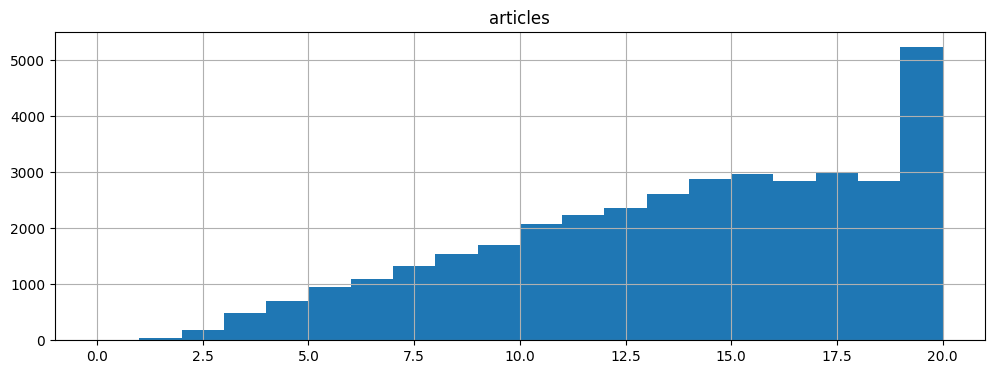

In [ ]:
tweet_word_count = [len(sentence.split()) for sentence in filterTweets.body]
tweet_word_count[:10]

# Analyze the distribution of sequences by looking at the length of the texts
pd.DataFrame({'articles': tweet_word_count}).hist(
    bins=20, figsize=(12, 4), range=[0, 20]
)
plt.show()

In [ ]:
tokenizer = Tokenizer(num_words=3000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)
valid_sequence = tokenizer.texts_to_sequences(eval_data_x)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)
pad_valid = pad_sequences(valid_sequence, T)

# Define the model architecture
model_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_vec
model_vec.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_vec.h5", save_best_only=True)

# Train the model_vec
history_subjectivity_tokenizer = model_vec.fit(pad_train, y_train, epochs=15, batch_size=16, validation_data=(pad_test, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_vec on the test set
model_vec.load_weights("model_polarity_vec.h5")
test_loss, test_acc = model_vec.evaluate(pad_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time_eval = time.time()
y_pred = model_vec.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_vec.predict(pad_valid)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report( y_test,y_pred,time_taken,len( y_test), eval_data_y_polarity, y_pred_eval, time_taken_eval, len(eval_data_y_polarity))

Epoch 1/15
1294/1294 [==============================] - 55s 40ms/step - loss: 0.3740 - accuracy: 0.8399 - val_loss: 0.2701 - val_accuracy: 0.8928
Epoch 2/15
1294/1294 [==============================] - 60s 46ms/step - loss: 0.2153 - accuracy: 0.9217 - val_loss: 0.2440 - val_accuracy: 0.9059
Epoch 3/15
1294/1294 [==============================] - 47s 36ms/step - loss: 0.1709 - accuracy: 0.9403 - val_loss: 0.2280 - val_accuracy: 0.9102
Epoch 4/15
1294/1294 [==============================] - 47s 36ms/step - loss: 0.1345 - accuracy: 0.9534 - val_loss: 0.2410 - val_accuracy: 0.9117
Epoch 5/15
1294/1294 [==============================] - 49s 38ms/step - loss: 0.1051 - accuracy: 0.9668 - val_loss: 0.2719 - val_accuracy: 0.9032
Epoch 6/15
1294/1294 [==============================] - 53s 41ms/step - loss: 0.0781 - accuracy: 0.9754 - val_loss: 0.3166 - val_accuracy: 0.9044
Epoch 7/15
1294/1294 [==============================] - 52s 40ms/step - loss: 0.0574 - accuracy: 0.9836 - val_loss: 0.3435 -

In [ ]:
# Tokenise words by splittign them up.
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_lemma)
# Creates a dictionary of each word.
word_index = tokenizer.word_index
#Transforms each text into a sequence of interger from the word_index dictionary
train_sequences = tokenizer.texts_to_sequences(X_train_lemma)
test_sequences = tokenizer.texts_to_sequences(X_test_lemma)
valid_sequences = tokenizer.texts_to_sequences(eval_data_x_lemma)

# Pad the train sequence and make sure that the test sequence are of same length
pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequences,T)
pad_valid = pad_sequences(valid_sequences,T)

# Define the model_lemma_vec architecture
model_lemma_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_lemma_vec
model_lemma_vec.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_lemma_vec.h5", save_best_only=True)

# Train the model_lemma_vec
history_subjectivity_tokenizer_lemma = model_lemma_vec.fit(pad_train, y_train_lemma, epochs=15, batch_size=16, validation_data=(pad_test, y_test_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_lemma_vec on the test set
model_lemma_vec.load_weights("model_polarity_lemma_vec.h5")
test_loss, test_acc = model_lemma_vec.evaluate(pad_test, y_test_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_vec.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_lemma_vec.predict(pad_valid)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval
metric_report( y_test_lemma,y_pred,time_taken,len( y_test_lemma), eval_data_y_polarity_lemma, y_pred_eval, time_taken_eval, len(eval_data_y_polarity_lemma))

Epoch 1/15
1294/1294 [==============================] - 57s 42ms/step - loss: 0.3737 - accuracy: 0.8396 - val_loss: 0.2704 - val_accuracy: 0.8924
Epoch 2/15
1294/1294 [==============================] - 47s 36ms/step - loss: 0.2165 - accuracy: 0.9205 - val_loss: 0.2397 - val_accuracy: 0.9046
Epoch 3/15
1294/1294 [==============================] - 49s 38ms/step - loss: 0.1766 - accuracy: 0.9351 - val_loss: 0.2581 - val_accuracy: 0.9028
Epoch 4/15
1294/1294 [==============================] - 54s 42ms/step - loss: 0.1468 - accuracy: 0.9486 - val_loss: 0.2814 - val_accuracy: 0.8995
Epoch 5/15
1294/1294 [==============================] - 54s 41ms/step - loss: 0.1135 - accuracy: 0.9611 - val_loss: 0.3020 - val_accuracy: 0.9026
Epoch 6/15
1294/1294 [==============================] - 52s 40ms/step - loss: 0.0887 - accuracy: 0.9725 - val_loss: 0.3062 - val_accuracy: 0.8957
Epoch 7/15
1294/1294 [==============================] - 55s 42ms/step - loss: 0.0636 - accuracy: 0.9816 - val_loss: 0.4009 -

In [ ]:
tokenizer = Tokenizer(num_words=3000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_no)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_no)
test_sequence = tokenizer.texts_to_sequences(X_test_no)
valid_sequence = tokenizer.texts_to_sequences(eval_data_x_no)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)
pad_valid = pad_sequences(valid_sequence, T)

# Define the model architecture
model_no_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_no_vec
model_no_vec.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_no_vec.h5", save_best_only=True)

# Train the model_no_vec
history_subjectivity_no_tokenizer = model_no_vec.fit(pad_train, y_train_no, epochs=15, batch_size=16, validation_data=(pad_test, y_test_no), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_no_vec on the test set
model_no_vec.load_weights("model_polarity_no_vec.h5")
test_loss, test_acc = model_no_vec.evaluate(pad_test, y_test_no)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time_eval = time.time()
y_pred = model_no_vec.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_no_vec.predict(pad_valid)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report( y_test_no,y_pred,time_taken,len( y_test_no), eval_data_y_polarity_no, y_pred_eval, time_taken_eval, len(eval_data_y_polarity_no))

Epoch 1/15
1294/1294 [==============================] - 56s 41ms/step - loss: 0.3571 - accuracy: 0.8480 - val_loss: 0.2396 - val_accuracy: 0.9073
Epoch 2/15
1294/1294 [==============================] - 55s 43ms/step - loss: 0.2011 - accuracy: 0.9242 - val_loss: 0.2302 - val_accuracy: 0.9080
Epoch 3/15
1132/1294 [=========================>....] - ETA: 6s - loss: 0.1542 - accuracy: 0.9448

In [ ]:
filterSubjTweets

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,preprocessed_text,sentiment,subjectivity,sentiment_category,subjectivity_category
39968,4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,0.5106,0.900000,1,1
10501,2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,-0.4939,0.600000,0,1
38261,4276279,1187430268967231488,TSLA,jack,2019-10-24,Now anyone can buy $42 or even $1 worth of Ber...,298,589,0,887,now anyon can buy or even worth of berkshir ha...,0.9077,0.568197,1,1
27692,4076527,1107399412492455936,TSLA,ElectricTempus,2019-03-17,"People are buying Tesla’s, in their Tesla’s. ...",292,0,0,292,peopl are buy tesla in their tesla thi is mani...,0.6369,0.550000,1,1
15224,3750143,1000079401684557824,TSLA,MattLevinson,2018-05-25,Thank you @elonmusk and @tesla for by FAR the ...,290,840,0,1130,thank you and for by far the best consum produ...,0.6705,0.675000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,878057,797455918141214721,AAPL,cnntech,2016-11-12,This school helps inexperienced programmers la...,0,38,82,120,thi school help inexperienc programm land job ...,0.3818,0.600000,1,1
1823,875999,796549335836229632,AAPL,Sandro_power,2016-11-10,$AAPL $SPY AND $STLD Video https://youtu.be/o0...,0,24,33,57,aapl spi and stld video explain my plan that i...,0.2023,0.687500,1,1
12927,3347135,1111056020036571137,MSFT,simpltrader,2019-03-28,Day 8 of #25KSimplChallenge An awesome day wit...,0,28,28,56,day of an awesom day with shop wa up k profit ...,0.9685,0.645000,1,1
18187,3856253,1031725885106343936,TSLA,TESLAcharts,2018-08-21,A FingerChart dedicated to my favorite follow ...,0,3,55,58,a fingerchart dedic to my favorit follow on tw...,0.7184,1.000000,1,1


# Enhanced Classification for Sarcasm Detection Model

Importing a Kaggle Sarcasm Headlines dataset to train our model to detect sarcasm in tweets

In [ ]:
sarcasm_df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines = True)

In [ ]:
sarcasm_df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [ ]:
datasetInfo(sarcasm_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB
 Dataset Information and type 
 None
--------------------------------------------------------

 Data Types: 
is_sarcastic     int64
headline        object
article_link    object
dtype: object
--------------------------------------------------------

 Rows and Columns: 
(28619, 3)
--------------------------------------------------------

 Column Names: 
Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')
--------------------------------------------------------

 Null Values: 
is_sarcastic    0.0
headline        0.0
article_link    0.0
dtype: float64
--------------------------------------------------------

 

In [ ]:
sarcasm_df["is_sarcastic"].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

### Clean the Sarcasm Dataframe text

In [ ]:
clean_dataframe_text(sarcasm_df,"headline",False)

,is_sarcastic,headline,article_link
0,1,thirtysometh scientist unveil doomsday clock o...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep total nail whi congress is fall short ...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggi delici differ recip,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevent liar from get to work,https://local.theonion.com/inclement-weather-p...
4,1,mother come pretti close to use word stream co...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jew to celebr rosh hashasha or someth,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,intern affair investig disappoint conspiraci d...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beauti accept speech thi week came fr...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mar probe destroy by orbit spielbergg space palac,https://www.theonion.com/mars-probe-destroyed-...


In [ ]:
X_sarcasm = sarcasm_df["headline"].values 
y_sarcasm = sarcasm_df["is_sarcastic"].values
X_train_sarcasm, X_test_sarcasm, y_train_sarcasm, y_test_sarcasm = train_test_split(
    X_sarcasm, y_sarcasm, test_size=0.20, random_state=42)

In [ ]:
X_train_sarcasm.shape

(22895,)

In [ ]:
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_sarcasm)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_sarcasm)
test_sequence = tokenizer.texts_to_sequences(X_test_sarcasm)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)

max_length = max(len(seq) for seq in train_sequences)

# Define the model architecture
model_sarcasm = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_length, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_sarcasm.summary()
# Compile the model_sarcasm
model_sarcasm.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_sarcasm.h5", save_best_only=True)

# Train the model_sarcasm
history_sarcasm = model_sarcasm.fit(pad_train, y_train_sarcasm, epochs=10, batch_size=32, validation_data=(pad_test, y_test_sarcasm), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_sarcasm on the test set
model_sarcasm.load_weights("model_sarcasm.h5")
test_loss, test_acc = model_sarcasm.evaluate(pad_test, y_test_sarcasm)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_sarcasm.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time
metric_report_noeval(y_test_sarcasm,y_pred,time_taken,len(y_test_sarcasm))

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 38, 100)           1768900   
                                                                 
 bidirectional_9 (Bidirectio  (None, 38, 128)          84480     
 nal)                                                            
                                                                 
 global_max_pooling1d_9 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_80 (Dense)            (None, 32)                4128      
                                                                 
 dropout_56 (Dropout)        (None, 32)                0         
                                                                 
 dense_81 (Dense)            (None, 1)               

In [ ]:
filterTweetsTemp = filterTweets.copy()

In [ ]:
X_train_temp = filterTweetsTemp['body']

In [ ]:
print(len(X_train_temp))

41625


In [ ]:
# Tokenise words by splittign them up.
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_temp)
# Creates a dictionary of each word.
word_index = tokenizer.word_index
#Transforms each text into a sequence of interger from the word_index dictionary
test_sequence_x = tokenizer.texts_to_sequences(X_train_temp)

# Pad the train sequence and make sure that the test sequence are of same length
pad_train_x = pad_sequences(test_sequence_x)


In [ ]:
sarcasm_pred = model_sarcasm.predict(pad_train_x)

1301/1301 [==============================] - 16s 12ms/step


In [ ]:
sarcasm_pred = (sarcasm_pred >= 0.5).astype(int)
print(sarcasm_pred)

[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


In [ ]:
len(sarcasm_pred)

41625

In [ ]:
filterTweetsTemp['is_sarcasm'] = sarcasm_pred

In [ ]:
filterTweetsTemp

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,preprocessed_text,sentiment,subjectivity,sentiment_category,subjectivity_category,is_sarcasm
16050,3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,0.7783,0.457143,1,0,1
29670,4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,0.0000,0.400000,0,0,1
39968,4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,0.5106,0.900000,1,1,0
10501,2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,-0.4939,0.600000,-1,1,0
33022,4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financi insan to buy anyth ex...,0.2350,0.383333,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12929,3347805,1113794842461724672,MSFT,StockRockNRoll,2019-04-04,Add $SNWV | #SANUWAVEHealth to the top of your...,0,82,97,179,add snwv to the top of your watchlist trade at...,0.5707,0.500000,1,0,1
18187,3856253,1031725885106343936,TSLA,TESLAcharts,2018-08-21,A FingerChart dedicated to my favorite follow ...,0,3,55,58,a fingerchart dedic to my favorit follow on tw...,0.7184,1.000000,1,1,0
1820,873615,795832008656252928,AAPL,Sandro_power,2016-11-08,$AAPL in my Video https://youtu.be/9ZNFi0B4CsQ...,0,31,36,67,aapl in my video i talk about the special aapl...,0.4019,0.571429,1,1,1
1818,872187,795454505357889537,AAPL,ppprophet,2016-11-07,$SPX UPTREND LINE BREAKDOWN #stocks #STOCKMAR...,0,41,52,93,spx uptrend line breakdown vix tvix uvxi xiv v...,0.0000,0.000000,0,0,1
